## Initial Steps

In order to perfom an accurate analyisis we will make some transformation and cleaning. We will add some columns with continent names and another column duration in minutes, besides, the column for artist names is crowded oftentimes with more artists, due to features. So, we want to get individual names.

We will check for null values and duplicate records as well. 

Each snippet is filled with annotations to follow along.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install pycountry
import pycountry as pc


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv(r'C:\Users\HP\Desktop\DA\Spotify dataset/universal_top_spotify_songs.csv')
df.head(5)

spotify_id                               name       artists  \
0  3CWq0pAKKTWb0K4yiglDc4  You’re Losing Me (From The Vault)  Taylor Swift   
1  3rUGC1vUpkDG9CZFHMur1t                             greedy    Tate McRae   
2  1BxfuPKGuaTgP7aM0Bbdwr                       Cruel Summer  Taylor Swift   
3  0bYg9bo50gSsH3LtXe2SQn    All I Want for Christmas Is You  Mariah Carey   
4  3vkCueOmm7xQDoJ17W1Pm3              My Love Mine All Mine        Mitski   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1              49               49     NaN    2023-12-01   
1           2              -1               -1     NaN    2023-12-01   
2           3               3                1     NaN    2023-12-01   
3           4              -2                7     NaN    2023-12-01   
4           5              -1               -2     NaN    2023-12-01   

   popularity  is_explicit  duration_ms  \
0           0        False       277831   
1         100         True       131872   
2          98        False       178426   
3          94        False       241106   
4          98        False       137773   

                               album_name album_release_date  danceability  \
0       You're Losing Me (From The Vault)         2023-11-29         0.747   
1                                  greedy         2023-09-15         0.750   
2                                   Lover         2019-08-23         0.552   
3                         Merry Christmas         1994-10-28         0.336   
4  The Land Is Inhospitable and So Are We         2023-09-15         0.504   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.391    0   -13.767     1       0.0520         0.529          0.003000   
1   0.733    6    -3.180     0       0.0319         0.256          0.000000   
2   0.702    9    -5.707     1       0.1570         0.117          0.000021   
3   0.627    7    -7.463     1       0.0384         0.164          0.000000   
4   0.308    9   -14.958     1       0.0321         0.868          0.135000   

   liveness  valence    tempo  time_signature  
0    0.1110    0.195  102.984               4  
1    0.1140    0.844  111.018               1  
2    0.1050    0.564  169.994               4  
3    0.0708    0.350  150.273               4  
4    0.1580    0.121  113.950               4

In [4]:
# Checking for duplicate values
df[df.duplicated()].sum()

spotify_id            0.0
name                  0.0
artists               0.0
daily_rank            0.0
daily_movement        0.0
weekly_movement       0.0
country               0.0
snapshot_date         0.0
popularity            0.0
is_explicit           0.0
duration_ms           0.0
album_name            0.0
album_release_date    0.0
danceability          0.0
energy                0.0
key                   0.0
loudness              0.0
mode                  0.0
speechiness           0.0
acousticness          0.0
instrumentalness      0.0
liveness              0.0
valence               0.0
tempo                 0.0
time_signature        0.0
dtype: float64

In [5]:
# And null values
df.isna().sum()

spotify_id               0
name                    21
artists                 21
daily_rank               0
daily_movement           0
weekly_movement          0
country               2206
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name              33
album_release_date      33
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

In [6]:
# We can see there is one row with no song info
df[df['artists'].isnull()]

spotify_id name artists  daily_rank  daily_movement  \
76445   7lyv2sysHCzFjypILxAynT  NaN     NaN          36              14   
76777   7lyv2sysHCzFjypILxAynT  NaN     NaN          18              32   
77314   7lyv2sysHCzFjypILxAynT  NaN     NaN           5              45   
77391   7lyv2sysHCzFjypILxAynT  NaN     NaN          32              18   
77605   7lyv2sysHCzFjypILxAynT  NaN     NaN          46               4   
78473   7lyv2sysHCzFjypILxAynT  NaN     NaN          25              25   
78577   7lyv2sysHCzFjypILxAynT  NaN     NaN          29              21   
78810   7lyv2sysHCzFjypILxAynT  NaN     NaN          12              38   
78965   7lyv2sysHCzFjypILxAynT  NaN     NaN          17              33   
79219   7lyv2sysHCzFjypILxAynT  NaN     NaN          21              29   
79290   7lyv2sysHCzFjypILxAynT  NaN     NaN          42               8   
79307   7lyv2sysHCzFjypILxAynT  NaN     NaN           9              41   
79559   7lyv2sysHCzFjypILxAynT  NaN     NaN          11              39   
80446   0kvD9ksvXyRHANPypIpkIh  NaN     NaN          48               2   
80973   0kvD9ksvXyRHANPypIpkIh  NaN     NaN          25              25   
82462   0kvD9ksvXyRHANPypIpkIh  NaN     NaN          20              30   
82635   0kvD9ksvXyRHANPypIpkIh  NaN     NaN          43               7   
82890   0kvD9ksvXyRHANPypIpkIh  NaN     NaN          48               2   
82979   0kvD9ksvXyRHANPypIpkIh  NaN     NaN          37              13   
83229   0kvD9ksvXyRHANPypIpkIh  NaN     NaN          37              13   
150593  6yxtsR3nc3aUL1wcbLn8A3  NaN     NaN          30               1   

        weekly_movement country snapshot_date  popularity  is_explicit  \
76445                14      VE    2023-11-10           0         True   
76777                32      SV    2023-11-10           0         True   
77314                45      PE    2023-11-10           0         True   
77391                18      PA    2023-11-10           0         True   
77605                 4      NI    2023-11-10           0         True   
78473                25      HN    2023-11-10           0         True   
78577                21      GT    2023-11-10           0         True   
78810                38      ES    2023-11-10           0         True   
78965                33      EC    2023-11-10           0         True   
79219                29      CR    2023-11-10           0         True   
79290                 8      CO    2023-11-10           0         True   
79307                41      CL    2023-11-10           0         True   
79559                39      BO    2023-11-10           0         True   
80446                 2      SV    2023-11-09           0         True   
80973                25      PE    2023-11-09           0         True   
82462                30      ES    2023-11-09           0         True   
82635                 7      EC    2023-11-09           0         True   
82890                 2      CR    2023-11-09           0         True   
82979                13      CL    2023-11-09           0         True   
83229                13      BO    2023-11-09           0         True   
150593               20      NG    2023-10-21           0        False   

        duration_ms album_name album_release_date  danceability  energy  key  \
76445             0        NaN                NaN         0.730   0.792    0   
76777             0        NaN                NaN         0.730   0.792    0   
77314             0        NaN                NaN         0.730   0.792    0   
77391             0        NaN                NaN         0.730   0.792    0   
77605             0        NaN                NaN         0.730   0.792    0   
78473             0        NaN                NaN         0.730   0.792    0   
78577             0        NaN                NaN         0.730   0.792    0   
78810             0        NaN                NaN         0.730   0.792    0   
78965             0 

In [7]:
# Dropping that record
df.dropna(subset=['artists'], inplace=True)

In [8]:
# Now we want to replace True and False in the 'is_explicit' column for 1 and 0 values
def explicit(i):
    return(
    df.loc[:,'is_explicit']
    .replace(False, 0)
    .replace(True, 1)
    )
df = df.assign(is_explicit=explicit)
df.head()

spotify_id                               name       artists  \
0  3CWq0pAKKTWb0K4yiglDc4  You’re Losing Me (From The Vault)  Taylor Swift   
1  3rUGC1vUpkDG9CZFHMur1t                             greedy    Tate McRae   
2  1BxfuPKGuaTgP7aM0Bbdwr                       Cruel Summer  Taylor Swift   
3  0bYg9bo50gSsH3LtXe2SQn    All I Want for Christmas Is You  Mariah Carey   
4  3vkCueOmm7xQDoJ17W1Pm3              My Love Mine All Mine        Mitski   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1              49               49     NaN    2023-12-01   
1           2              -1               -1     NaN    2023-12-01   
2           3               3                1     NaN    2023-12-01   
3           4              -2                7     NaN    2023-12-01   
4           5              -1               -2     NaN    2023-12-01   

   popularity  is_explicit  duration_ms  \
0           0            0       277831   
1         100            1       131872   
2          98            0       178426   
3          94            0       241106   
4          98            0       137773   

                               album_name album_release_date  danceability  \
0       You're Losing Me (From The Vault)         2023-11-29         0.747   
1                                  greedy         2023-09-15         0.750   
2                                   Lover         2019-08-23         0.552   
3                         Merry Christmas         1994-10-28         0.336   
4  The Land Is Inhospitable and So Are We         2023-09-15         0.504   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.391    0   -13.767     1       0.0520         0.529          0.003000   
1   0.733    6    -3.180     0       0.0319         0.256          0.000000   
2   0.702    9    -5.707     1       0.1570         0.117          0.000021   
3   0.627    7    -7.463     1       0.0384         0.164          0.000000   
4   0.308    9   -14.958     1       0.0321         0.868          0.135000   

   liveness  valence    tempo  time_signature  
0    0.1110    0.195  102.984               4  
1    0.1140    0.844  111.018               1  
2    0.1050    0.564  169.994               4  
3    0.0708    0.350  150.273               4  
4    0.1580    0.121  113.950               4

In [9]:
# Separating the 'artists' column into new columns to see the artists involved in the song
df2 = df['artists'].str.split(', ', expand=True)
df2.nunique()

0     1995
1     1134
2      434
3      138
4       58
5       29
6       10
7        6
8        5
9        4
10       3
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163762 entries, 0 to 163782
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       163762 non-null  object
 1   1       64522 non-null   object
 2   2       19077 non-null   object
 3   3       4868 non-null    object
 4   4       2213 non-null    object
 5   5       1103 non-null    object
 6   6       452 non-null     object
 7   7       330 non-null     object
 8   8       158 non-null     object
 9   9       145 non-null     object
 10  10      142 non-null     object
 11  11      14 non-null      object
 12  12      14 non-null      object
 13  13      14 non-null      object
 14  14      14 non-null      object
 15  15      14 non-null      object
 16  16      14 non-null      object
 17  17      14 non-null      object
 18  18      14 non-null      object
 19  19      14 non-null      object
 20  20      14 non-null      object
 21  21      14 non-null      object
 

We can check that there are up to 11 artists in some songs, however, we will keep only 2 columns for the 'feat_artists', dividing them into 'feat_1' and 'feat_2'. 

In [11]:
df = pd.concat([df2, df], axis=1)
df.rename(columns = {0:'main_artist', 1:'feat_1', 2:'feat_2'}, inplace=True)
df.sample(5)

main_artist feat_1 feat_2     3     4     5     6     7     8     9  \
44965          Ozuna   Feid   None  None  None  None  None  None  None  None   
146122      Doja Cat   None   None  None  None  None  None  None  None  None   
26182   Harry Styles   None   None  None  None  None  None  None  None  None   
11039            SZA   None   None  None  None  None  None  None  None  None   
124435          Mora   None   None  None  None  None  None  None  None  None   

          10    11    12    13    14    15    16    17    18    19    20  \
44965   None  None  None  None  None  None  None  None  None  None  None   
146122  None  None  None  None  None  None  None  None  None  None  None   
26182   None  None  None  None  None  None  None  None  None  None  None   
11039   None  None  None  None  None  None  None  None  None  None  None   
124435  None  None  None  None  None  None  None  None  None  None  None   

          21    22    23    24    25              spotify_id  \
44965   None  None  None  None  None  1zsPaEkglFvxjAhrM8yhpr   
146122  None  None  None  None  None  56y1jOTK0XSvJzVv9vHQBK   
26182   None  None  None  None  None  4Dvkj6JhhA12EX05fT7y2e   
11039   None  None  None  None  None  4iZ4pt7kvcaH6Yo8UoZ4s2   
124435  None  None  None  None  None  0sfk352FO8bJUjWjIsyzSR   

                              name       artists  daily_rank  daily_movement  \
44965                      Hey Mor   Ozuna, Feid          39               0   
146122          Paint The Town Red      Doja Cat           9              -3   
26182                    As It Was  Harry Styles          40              -3   
11039                       Snooze           SZA          40              10   
124435  DONDE SE APRENDE A QUERER?          Mora          25               0   

        weekly_movement country snapshot_date  popularity  is_explicit  \
44965                -2      PA    2023-11-19          87            0   
146122               41      SK    2023-10-22          88            1   
26182                 0      SG    2023-11-24          94            0   
11039                -6      ZA    2023-11-28          92            1   
124435               -1      PY    2023-10-28          87            0   

        duration_ms     album_name album_release_date  danceability  energy  \
44965        196600       OzuTochi         2022-10-07         0.901   0.589   
146122       230480        Scarlet         2023-09-20         0.864   0.556   
26182        167303  Harry's House         2022-05-20         0.520   0.731   
11039        201800            SOS         2022-12-09         0.559   0.551   
124435       144427       ESTRELLA         2023-08-28         0.722   0.519   

        key  loudness  mode  speechiness  acousticness  instrumentalness  \
44965     1    -6.713     0       0.2890       0.00302          0.000237   
146122    2    -7.683     0       0.1940       0.25500          0.000004   
26182     6    -5.338     0       0.0557       0.34200          0.001010   
11039     5    -7.231     1       0.1320       0.14100          0.000000   
124435    8   -10.142     1       0.2970       0.55500          0.000000   

        liveness  valence    tempo  time_signature  
44965     0.0992    0.399   98.002               4  
146122    0.1120    0.726   99.974               4  
26182     0.3110    0.662  173.930               4  
11039     0.1100    0.392  143.008               4  
124435    0.1180    0.779  170.058               4

In [12]:
# We want to get rid of the remaining columns
df.drop(df.iloc[:, 3:27 ], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163762 entries, 0 to 163782
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   main_artist         163762 non-null  object 
 1   feat_1              64522 non-null   object 
 2   feat_2              19077 non-null   object 
 3   name                163762 non-null  object 
 4   artists             163762 non-null  object 
 5   daily_rank          163762 non-null  int64  
 6   daily_movement      163762 non-null  int64  
 7   weekly_movement     163762 non-null  int64  
 8   country             161556 non-null  object 
 9   snapshot_date       163762 non-null  object 
 10  popularity          163762 non-null  int64  
 11  is_explicit         163762 non-null  int64  
 12  duration_ms         163762 non-null  int64  
 13  album_name          163750 non-null  object 
 14  album_release_date  163750 non-null  object 
 15  danceability        163762 non-nul

In [13]:
# Changing data types for date columns
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

In [14]:
# Creating two new columns to get the release year and days since the album containing the song was also released
df['release_year'] = df['album_release_date'].dt.year
df['days_since_album_release'] = (df['snapshot_date'] - df['album_release_date']).dt.days

In [15]:
# Dropping the artists column, since we now have separated columns for the main artists and featured artists
df.drop(['artists'], axis=1, inplace= True)

In [16]:
# Creating a column with duration in minutes
df['duration_min']= round(df['duration_ms'] / (1000*60), 2)

In [17]:
# Now we want to replace the 'key' column with the actual key
def key_full(key):
    return(
    df.loc[:,'key']
    .replace(0, 'C')
    .replace(1, 'C#')
    .replace(2, 'D')
    .replace(3, 'Eb')
    .replace(4, 'E')
    .replace(5, 'F')
    .replace(6, 'F#')
    .replace(7, 'G')
    .replace(8, 'G#')
    .replace(9, 'A')
    .replace(10, 'Bb')
    .replace(11, 'B')
    )
df = df.assign(key = key_full)

In [18]:
# Creating a function to replace country codes with full country names with pycountry and 'Global' for records with null values,
# since these records are from the Global Top

def country_name(dataframe, col):

    
    for index, code in enumerate(dataframe[col]):
        if code:
            try:
                country = pc.countries.get(alpha_2=code)
                df.at[index, col]= country.name
            except AttributeError:
                pass
            except LookupError:
                df.at[index, col] = 'Global'
country_name(df, 'country')
df.sample(5)

main_artist feat_1        feat_2  \
53513   Hassan El Shafei   Bosy  Double Zuksh   
32199     iñigo quintero   None          None   
150835   Heuss L'enfoiré   Gazo          None   
151750       Troye Sivan   None          None   
46896               GIMS  Morad   SativaMusic   

                                              name  daily_rank  \
53513   Mesh Shayfenhom ( Coke Studio Egypt 2023 )        46.0   
32199                                  Si No Estás        17.0   
150835                                      Saiyan        22.0   
151750                           One Of Your Girls        42.0   
46896                                         SEYA        20.0   

        daily_movement  weekly_movement      country snapshot_date  \
53513              3.0             -3.0        Egypt    2023-11-17   
32199              0.0             -3.0     Colombia    2023-11-23   
150835             0.0             28.0   Luxembourg    2023-10-21   
151750             3.0              8.0        Spain    2023-10-21   
46896             -6.0              0.0  Switzerland    2023-11-19   

        popularity  is_explicit  duration_ms  \
53513         59.0          0.0     222760.0   
32199         99.0          0.0     184061.0   
150835        76.0          1.0     189840.0   
151750        80.0          0.0     181481.0   
46896         69.0          0.0     188484.0   

                                         album_name album_release_date  \
53513    Mesh Shayfenhom ( Coke Studio Egypt 2023 )         2023-08-03   
32199                                   Si No Estás         2022-09-23   
150835                             Chef D'orchestre         2023-06-30   
151750                 Something To Give Each Other         2023-10-13   
46896   LES DERNIÈRES VOLONTÉS DE MOZART (SYMPHONY)         2023-10-05   

        danceability  energy key  loudness  mode  speechiness  acousticness  \
53513          0.741   0.905   G    -3.336   0.0       0.0442        0.1570   
32199          0.537   0.421   F    -8.720   1.0       0.0285        0.8270   
150835         0.775   0.808   G    -4.568   0.0       0.0353        0.3530   
151750         0.629   0.654   B    -7.852   0.0       0.0584        0.0878   
46896          0.798   0.681  Bb    -4.818   0.0       0.0722        0.2190   

        instrumentalness  liveness  valence    tempo  time_signature  \
53513           0.000001     0.189    0.668  124.008             4.0   
32199           0.000000     0.138    0.524   98.224             4.0   
150835          0.000042     0.207    0.638  125.013             4.0   
151750          0.006550     0.220    0.799   93.034             4.0   
46896           0.001970     0.137    0.434  101.005             4.0   

        release_year  days_since_album_release  duration_min  
53513         2023.0                     106.0          3.71  
32199         2022.0                     426.0          3.07  
150835        2023.0                     113.0          3.16  
151750        2023.0                       8.0          3.02  
46896         2023.0                      45.0          3.14

In [19]:
# Verifying the Global records

df.loc[df['country']=='Global']

main_artist              feat_1         feat_2  \
0       Taylor Swift                None           None   
1         Tate McRae                None           None   
2       Taylor Swift                None           None   
3       Mariah Carey                None           None   
4             Mitski                None           None   
...              ...                 ...            ...   
160166        Maluma          Carin Leon           None   
160167      Calle 24         Chino Pacas  Fuerza Regida   
160168    Peso Pluma  Gabito Ballesteros       Junior H   
160169  Harry Styles                None           None   
160170           SZA                None           None   

                                     name  daily_rank  daily_movement  \
0       You’re Losing Me (From The Vault)         1.0            49.0   
1                                  greedy         2.0            -1.0   
2                            Cruel Summer         3.0             3.0   
3         All I Want for Christmas Is You         4.0            -2.0   
4                   My Love Mine All Mine         5.0            -1.0   
...                                   ...         ...             ...   
160166                        Según Quién        25.0            25.0   
160167                           Que Onda        26.0            24.0   
160168                          LADY GAGA        27.0            23.0   
160169                          As It Was        28.0            22.0   
160170                          Kill Bill        29.0            21.0   

        weekly_movement country snapshot_date  popularity  is_explicit  \
0                  49.0  Global    2023-12-01         0.0          0.0   
1                  -1.0  Global    2023-12-01       100.0          1.0   
2                   1.0  Global    2023-12-01        98.0          0.0   
3                   7.0  Global    2023-12-01        94.0          0.0   
4                  -2.0  Global    2023-12-01        98.0          0.0   
...                 ...     ...           ...         ...          ...   
160166              0.0  Global    2023-10-18        87.0          1.0   
160167              0.0  Global    2023-10-18        93.0          1.0   
160168              0.0  Global    2023-10-18        95.0          1.0   
160169              0.0  Global    2023-10-18        94.0          0.0   
160170              0.0  Global    2023-10-18        92.0          0.0   

        duration_ms                              album_name  \
0          277831.0       You're Losing Me (From The Vault)   
1          131872.0                                  greedy   
2          178426.0                                   Lover   
3          241106.0                         Merry Christmas   
4          137773.0  The Land Is Inhospitable and So Are We   
...             ...                                     ...   
160166     142334.0                                Don Juan   
160167     191466.0                                Que Onda   
160168     212878.0                                 GÉNESIS   
160169     167303.0                           Harry's House   
160170     153946.0                                     SOS   

       album_release_date  danceability  energy key  loudness  mode  \
0              2023-11-29         0.747   0.391   C   -13.767   1.0   
1              2023-09-15         0.750   0.733  F#    -3.180   0.0   
2              2019-08-23         0.552   0.702   A    -5.707   1.0   
3              1994-10-28         0.336   0.627   G    -7.463   1.0   
4              2023-09-15         0.504   0.308   A   -14.958   1.0   
...                   ...           ...     ...  ..       ...   ...   
160166         2023-08-25         0.909   0.762   A    -3.974   1.0   
160167         2023-08-30         0.808   0.944  Bb    -4.863   0.0   
160168         2023-06-29         0.646   0.736   F    -7.118   0.0   
160169         2022-05-20         0.520   0.731  F#    -5.338   0.0

In [20]:
df.isna().sum()

main_artist                     21
feat_1                       99261
feat_2                      144706
name                            21
daily_rank                      21
daily_movement                  21
weekly_movement                 21
country                          0
snapshot_date                   21
popularity                      21
is_explicit                     21
duration_ms                     21
album_name                      33
album_release_date              33
danceability                    21
energy                          21
key                             21
loudness                        21
mode                            21
speechiness                     21
acousticness                    21
instrumentalness                21
liveness                        21
valence                         21
tempo                           21
time_signature                  21
release_year                    33
days_since_album_release        33
duration_min        

In [21]:
df[df['main_artist'].isna()]

main_artist feat_1 feat_2 name  daily_rank  daily_movement  \
76445          NaN    NaN    NaN  NaN         NaN             NaN   
76777          NaN    NaN    NaN  NaN         NaN             NaN   
77314          NaN    NaN    NaN  NaN         NaN             NaN   
77391          NaN    NaN    NaN  NaN         NaN             NaN   
77605          NaN    NaN    NaN  NaN         NaN             NaN   
78473          NaN    NaN    NaN  NaN         NaN             NaN   
78577          NaN    NaN    NaN  NaN         NaN             NaN   
78810          NaN    NaN    NaN  NaN         NaN             NaN   
78965          NaN    NaN    NaN  NaN         NaN             NaN   
79219          NaN    NaN    NaN  NaN         NaN             NaN   
79290          NaN    NaN    NaN  NaN         NaN             NaN   
79307          NaN    NaN    NaN  NaN         NaN             NaN   
79559          NaN    NaN    NaN  NaN         NaN             NaN   
80446          NaN    NaN    NaN  NaN         NaN             NaN   
80973          NaN    NaN    NaN  NaN         NaN             NaN   
82462          NaN    NaN    NaN  NaN         NaN             NaN   
82635          NaN    NaN    NaN  NaN         NaN             NaN   
82890          NaN    NaN    NaN  NaN         NaN             NaN   
82979          NaN    NaN    NaN  NaN         NaN             NaN   
83229          NaN    NaN    NaN  NaN         NaN             NaN   
150593         NaN    NaN    NaN  NaN         NaN             NaN   

        weekly_movement                            country snapshot_date  \
76445               NaN  Venezuela, Bolivarian Republic of           NaT   
76777               NaN                        El Salvador           NaT   
77314               NaN                               Peru           NaT   
77391               NaN                             Panama           NaT   
77605               NaN                            Nigeria           NaT   
78473               NaN                           Honduras           NaT   
78577               NaN                          Guatemala           NaT   
78810               NaN                              Spain           NaT   
78965               NaN                            Ecuador           NaT   
79219               NaN                         Costa Rica           NaT   
79290               NaN                              Chile           NaT   
79307               NaN                              Chile           NaT   
79559               NaN    Bolivia, Plurinational State of           NaT   
80446               NaN                           Slovakia           NaT   
80973               NaN                               Peru           NaT   
82462               NaN                              Spain           NaT   
82635               NaN                 Dominican Republic           NaT   
82890               NaN                           Colombia           NaT   
82979               NaN                        Switzerland           NaT   
83229               NaN                           Bulgaria           NaT   
150593              NaN                           Malaysia           NaT   

        popularity  is_explicit  duration_ms album_name album_release_date  \
76445          NaN          NaN          NaN        NaN                NaT   
76777          NaN          NaN          NaN        NaN                NaT   
77314          NaN          NaN          NaN        NaN                NaT   
77391          NaN          NaN          NaN        NaN                NaT   
77605          NaN          NaN          NaN        NaN                NaT   
78473          NaN          NaN          NaN        NaN                NaT   
78577          NaN          NaN          NaN        NaN                NaT   
78810          NaN          NaN          NaN        NaN                NaT   
78965          NaN          NaN          NaN        NaN                NaT   
79219          NaN          NaN    

In [22]:
df.dropna(subset=['main_artist'], inplace=True)

In [23]:
# Finally we don't have null values (except for the feat. columns, which is what we want)
df.isna().sum()

main_artist                      0
feat_1                       99240
feat_2                      144685
name                             0
daily_rank                       0
daily_movement                   0
weekly_movement                  0
country                          0
snapshot_date                    0
popularity                       0
is_explicit                      0
duration_ms                      0
album_name                      12
album_release_date              12
danceability                     0
energy                           0
key                              0
loudness                         0
mode                             0
speechiness                      0
acousticness                     0
instrumentalness                 0
liveness                         0
valence                          0
tempo                            0
time_signature                   0
release_year                    12
days_since_album_release        12
duration_min        

In [24]:
# Now, we want to create a column with continents based on country column
# First, we need to check every country
df['country'].unique()

array(['Global', 'South Africa', 'Viet Nam',
       'Venezuela, Bolivarian Republic of', 'Uruguay', 'United States',
       'Ukraine', 'Taiwan, Province of China', 'Turkey', 'Thailand',
       'El Salvador', 'Slovakia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Romania', 'Paraguay', 'Portugal', 'Poland', 'Pakistan',
       'Philippines', 'Peru', 'Panama', 'New Zealand', 'Norway',
       'Netherlands', 'Nicaragua', 'Nigeria', 'Malaysia', 'Mexico',
       'Morocco', 'Latvia', 'Luxembourg', 'Lithuania', 'Kazakhstan',
       'Korea, Republic of', 'Japan', 'Italy', 'Iceland', 'India',
       'Israel', 'Ireland', 'Indonesia', 'Hungary', 'Honduras',
       'Hong Kong', 'Guatemala', 'Greece', 'United Kingdom', 'France',
       'Finland', 'Spain', 'Egypt', 'Estonia', 'Ecuador',
       'Dominican Republic', 'Denmark', 'Germany', 'Czechia',
       'Costa Rica', 'Colombia', 'Chile', 'Switzerland', 'Canada',
       'Belarus', 'Brazil', 'Bolivia, Plurinational State of', 'Bulgaria',
       'Bel

In [25]:
# AE stands for United Arab Emirates according to its ISO code, so me make the replacement
df.loc[df['country']=='AE', 'country']='United Arab Emirates'

In [26]:
# Checking once more
df['country'].unique()

array(['Global', 'South Africa', 'Viet Nam',
       'Venezuela, Bolivarian Republic of', 'Uruguay', 'United States',
       'Ukraine', 'Taiwan, Province of China', 'Turkey', 'Thailand',
       'El Salvador', 'Slovakia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Romania', 'Paraguay', 'Portugal', 'Poland', 'Pakistan',
       'Philippines', 'Peru', 'Panama', 'New Zealand', 'Norway',
       'Netherlands', 'Nicaragua', 'Nigeria', 'Malaysia', 'Mexico',
       'Morocco', 'Latvia', 'Luxembourg', 'Lithuania', 'Kazakhstan',
       'Korea, Republic of', 'Japan', 'Italy', 'Iceland', 'India',
       'Israel', 'Ireland', 'Indonesia', 'Hungary', 'Honduras',
       'Hong Kong', 'Guatemala', 'Greece', 'United Kingdom', 'France',
       'Finland', 'Spain', 'Egypt', 'Estonia', 'Ecuador',
       'Dominican Republic', 'Denmark', 'Germany', 'Czechia',
       'Costa Rica', 'Colombia', 'Chile', 'Switzerland', 'Canada',
       'Belarus', 'Brazil', 'Bolivia, Plurinational State of', 'Bulgaria',
       'Bel

In [27]:
# Creating a dictionary with continents in key section and countries in value section
continents = {
    'North America': ['United States', 'Mexico' , 'Canada'],
    'Central America': ['Costa Rica', 'Dominican Republic', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama', 'El Salvador'],
    'South America': ['Argentina', 'Bolivia, Plurinational State of', 'Brazil', 'Colombia', 'Chile', 'Ecuador', 'Paraguay',
                      'Peru', 'Uruguay', 'Venezuela, Bolivarian Republic of'],
    'Europe': ['Austria', 'Belgium', 'Bulgaria', 'Belarus', 'Switzerland', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Spain',
              'Finland', 'France', 'United Kingdom', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania', 'Luxembourg',
              'Latvia', 'Norway', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovakia', 'Ukraine'],
    'Asia': ['United Arab Emirates', 'Egypt', 'Hong Kong', 'Israel', 'India', 'Indonesia', 'Japan', 'Korea, Republic of', 'Kazakhstan', 
             'Malaysia', 'Philippines', 'Pakistan', 'Saudi Arabia', 'Singapore', 'Thailand', 'Turkey', 'Taiwan, Province of China', 
             'Viet Nam'],
    'Africa': ['Morocco', 'Nigeria', 'South Africa'],
    'Oceania': ['Australia', 'New Zealand'],
    'Global': ['Global']
}  
sum(len(i) for i in continents.values())

73

In [28]:
# Creating a function to assing those values to a new column
def assign_continent(country):
    for continent, countries_in_continent in continents.items():
        if country in countries_in_continent:
            return continent

df['continent'] = df['country'].map(assign_continent)

In [29]:
df.sample(5)

main_artist        feat_1       feat_2                  name  \
13704        Bad Bunny  Bryant Myers         None                  SEDA   
36174   Eslabon Armado    Peso Pluma         None       Ella Baila Sola   
129070   The Kid LAROI     Jung Kook  Central Cee              TOO MUCH   
59828      Skryptonite          None         None            Это любовь   
4611         Jung Kook          None         None  Standing Next to You   

        daily_rank  daily_movement  weekly_movement  \
13704         12.0            -1.0              3.0   
36174         48.0            -5.0             -4.0   
129070         3.0             0.0             47.0   
59828         24.0             2.0             -1.0   
4611          12.0            -1.0             -2.0   

                                country snapshot_date  popularity  \
13704                Dominican Republic    2023-11-28        88.0   
36174   Bolivia, Plurinational State of    2023-11-22        85.0   
129070               Korea, Republic of    2023-10-27        88.0   
59828                        Kazakhstan    2023-11-15        65.0   
4611                           Pakistan    2023-11-30        97.0   

        is_explicit  duration_ms                           album_name  \
13704           1.0     190476.0  nadie sabe lo que va a pasar mañana   
36174           0.0     165671.0                            DESVELADO   
129070          1.0     203894.0                             TOO MUCH   
59828           1.0     279250.0          Дом с нормальными явлениями   
4611            0.0     206019.0                               GOLDEN   

       album_release_date  danceability  energy key  loudness  mode  \
13704          2023-10-13         0.706   0.566  F#    -6.441   0.0   
36174          2023-04-28         0.668   0.758   F    -5.176   0.0   
129070         2023-10-19         0.758   0.703  Bb    -5.979   0.0   
59828          2015-01-01         0.358   0.416   C   -10.972   0.0   
4611           2023-11-03         0.711   0.809   D    -4.389   0.0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
13704        0.1260        0.2680          0.000001    0.1110    0.230   
36174        0.0332        0.4830          0.000019    0.0837    0.834   
129070       0.1720        0.2520          0.000000    0.1460    0.465   
59828        0.0596        0.3250          0.356000    0.1730    0.128   
4611         0.0955        0.0447          0.000000    0.3390    0.816   

          tempo  time_signature  release_year  days_since_album_release  \
13704   125.876             4.0        2023.0                      46.0   
36174   147.989             3.0        2023.0                     208.0   
129070   94.985             4.0        2023.0                       8.0   
59828   139.945             3.0        2015.0                    3240.0   
4611    106.017             4.0        2023.0                      27.0   

        duration_min        continent  
13704           3.17  Central America  
36174           2.76    South America  
129070          3.40             Asia  
59828           4.65             Asia  
4611            3.43             Asia

In [30]:
# We see the new column was successfully created
# Unfortunately we had to perform this process manually, since pycountry does not have an attribute to get continent names
df['continent'].value_counts()

Europe             64918
Asia               40478
South America      22502
Central America    15764
Africa              6718
North America       6667
Oceania             4509
Global              2206
Name: continent, dtype: int64

In [31]:
# Tempo in songs usually is made up of an integer so we round up tempo column
df['tempo'] = round(df['tempo'])

In [32]:
# Creating a column with the past week rank
df['past_week_rank'] = df['daily_rank'] + df['weekly_movement']

In [33]:
# Final check before EDA
df.sample(5)

main_artist   feat_1  feat_2         name  daily_rank  \
47136         Jungeli  Imen Es  Alonzo  Petit génie        10.0   
15978           Lojay  Olamide    None      Arizona        36.0   
46947           Toxi$     None    None       CRANKI        21.0   
113622         Guzior     None    None          WTC        44.0   
1856    Sfera Ebbasta    Lazza   Shiva          G63         7.0   

        daily_movement  weekly_movement   country snapshot_date  popularity  \
47136              1.0              2.0   Belgium    2023-11-19        68.0   
15978            -27.0             14.0   Nigeria    2023-11-27        50.0   
46947             -1.0             29.0   Belarus    2023-11-19        62.0   
113622             1.0             -4.0  Pakistan    2023-10-31        67.0   
1856              -1.0             -3.0     Italy    2023-12-01        80.0   

        is_explicit  duration_ms   album_name album_release_date  \
47136           1.0     217259.0  Petit génie         2023-08-04   
15978           1.0     139706.0      Arizona         2023-11-24   
46947           0.0     110638.0     MIND UP!         2022-07-08   
113622          1.0     124000.0        PLEŚŃ         2020-12-04   
1856            1.0     229253.0         X2VR         2023-11-17   

        danceability  energy key  loudness  mode  speechiness  acousticness  \
47136          0.794   0.578  C#    -5.932   0.0       0.2500         0.103   
15978          0.895   0.426   G    -7.454   1.0       0.0909         0.289   
46947          0.779   0.490  G#    -6.787   0.0       0.0629         0.121   
113622         0.671   0.662  F#    -7.189   0.0       0.1120         0.500   
1856           0.754   0.699   A    -5.498   0.0       0.0684         0.275   

        instrumentalness  liveness  valence  tempo  time_signature  \
47136           0.000012    0.3630    0.967  126.0             4.0   
15978           0.000010    0.0835    0.317  112.0             4.0   
46947           0.000037    0.1120    0.399  141.0             4.0   
113622          0.000000    0.1150    0.216  126.0             4.0   
1856            0.000000    0.2210    0.330  134.0             4.0   

        release_year  days_since_album_release  duration_min continent  \
47136         2023.0                     107.0          3.62    Europe   
15978         2023.0                       3.0          2.33    Africa   
46947         2022.0                     499.0          1.84    Europe   
113622        2020.0                    1061.0          2.07      Asia   
1856          2023.0                      14.0          3.82    Europe   

        past_week_rank  
47136             12.0  
15978             50.0  
46947             50.0  
113622            40.0  
1856               4.0

## Exploratory Data Analysis

In [34]:
df.shape

(163762, 31)

In [35]:
df.describe().T

count           mean           std           min  \
daily_rank                163762.0      25.466360     14.423566      1.000000   
daily_movement            163762.0       1.030789      7.393838    -46.000000   
weekly_movement           163762.0       4.880192     14.181433    -46.000000   
popularity                163762.0      77.528193     16.548431      0.000000   
is_explicit               163762.0       0.373145      0.483642      0.000000   
duration_ms               163762.0  194165.304601  48885.199114  34285.000000   
danceability              163762.0       0.686877      0.138235      0.159000   
energy                    163762.0       0.644857      0.162651      0.012400   
loudness                  163762.0      -6.637440      2.672955    -31.042000   
mode                      163762.0       0.508525      0.499929      0.000000   
speechiness               163762.0       0.104120      0.097613      0.023000   
acousticness              163762.0       0.287697      0.257905      0.000008   
instrumentalness          163762.0       0.018148      0.093238      0.000000   
liveness                  163762.0       0.172840      0.125449      0.015400   
valence                   163762.0       0.533926      0.228721      0.027100   
tempo                     163762.0     121.891538     28.060601     47.000000   
time_signature            163762.0       3.904257      0.435927      1.000000   
release_year              163750.0    2021.189973      6.615218   1942.000000   
days_since_album_release  163750.0     755.105496   2425.376189     -5.000000   
duration_min              163762.0       3.236059      0.814711      0.570000   
past_week_rank            163762.0      30.346552     16.704770      1.000000   

                                  25%            50%            75%  \
daily_rank                    13.0000      25.000000      38.000000   
daily_movement                -1.0000       0.000000       2.000000   
weekly_movement               -3.0000       1.000000       8.000000   
popularity                    66.0000      82.000000      90.000000   
is_explicit                    0.0000       0.000000       1.000000   
duration_ms               162767.0000  187368.000000  220000.000000   
danceability                   0.5930       0.706000       0.795000   
energy                         0.5410       0.666000       0.759000   
loudness                      -8.0670      -6.247000      -4.849000   
mode                           0.0000       1.000000       1.000000   
speechiness                    0.0400       0.061800       0.126000   
acousticness                   0.0826       0.192000       0.447000   
instrumentalness               0.0000       0.000002       0.000089   
liveness                       0.0974       0.120000       0.214000   
valence                        0.3620       0.528000       0.722000   
tempo                        100.0000     120.000000     140.000000   
time_signature                 4.0000       4.000000       4.000000   
release_year                2022.0000    2023.000000    2023.000000   
days_since_album_release      40.0000     117.000000     328.000000   
duration_min                   2.7100       3.120000       3.670000   
past_week_rank                15.0000      31.000000      50.000000   

                                 max  
daily_rank                    50.000  
daily_movement                49.000  
weekly_movement               49.000  
popularity                   100.000  
is_explicit                    1.000  
duration_ms               641941.000  
danceability                   0.982  
energy                         0.997  
loudness                       1.155  
mode                           1.000  
speechiness                    0.912  
acousticness                   0.996  
instrumentalness               0.970  
liveness                       0.968  
valence                        0.981  
tempo                        218.000  
time_signature      

In [36]:
df[(df['popularity']>0)].describe().T

count           mean           std           min  \
daily_rank                162394.0      25.476348     14.424112      1.000000   
daily_movement            162394.0       0.829723      6.961027    -46.000000   
weekly_movement           162394.0       4.705747     14.051001    -46.000000   
popularity                162394.0      78.181287     15.003248      1.000000   
is_explicit               162394.0       0.375020      0.484130      0.000000   
duration_ms               162394.0  194080.498972  48940.582892  34285.000000   
danceability              162394.0       0.687035      0.138392      0.159000   
energy                    162394.0       0.644661      0.162640      0.012400   
loudness                  162394.0      -6.637714      2.672958    -31.042000   
mode                      162394.0       0.506392      0.499961      0.000000   
speechiness               162394.0       0.104352      0.097784      0.023000   
acousticness              162394.0       0.288664      0.258062      0.000008   
instrumentalness          162394.0       0.018234      0.093409      0.000000   
liveness                  162394.0       0.172837      0.125415      0.015400   
valence                   162394.0       0.534425      0.228471      0.027100   
tempo                     162394.0     121.950460     28.069406     47.000000   
time_signature            162394.0       3.903574      0.437444      1.000000   
release_year              162382.0    2021.175173      6.640247   1942.000000   
days_since_album_release  162382.0     761.259290   2434.331646     -5.000000   
duration_min              162394.0       3.234650      0.815636      0.570000   
past_week_rank            162394.0      30.182094     16.676774      1.000000   

                                  25%            50%            75%  \
daily_rank                    13.0000      25.000000      38.000000   
daily_movement                -1.0000       0.000000       2.000000   
weekly_movement               -3.0000       1.000000       8.000000   
popularity                    66.0000      82.000000      90.000000   
is_explicit                    0.0000       0.000000       1.000000   
duration_ms               162637.0000  187200.000000  219724.000000   
danceability                   0.5930       0.706000       0.795000   
energy                         0.5410       0.666000       0.759000   
loudness                      -8.0670      -6.247000      -4.850000   
mode                           0.0000       1.000000       1.000000   
speechiness                    0.0400       0.062000       0.126000   
acousticness                   0.0841       0.195000       0.449000   
instrumentalness               0.0000       0.000002       0.000089   
liveness                       0.0974       0.120000       0.214000   
valence                        0.3620       0.528000       0.722000   
tempo                        100.0000     120.000000     140.000000   
time_signature                 4.0000       4.000000       4.000000   
release_year                2022.0000    2023.000000    2023.000000   
days_since_album_release      41.0000     119.000000     332.000000   
duration_min                   2.7100       3.120000       3.660000   
past_week_rank                15.0000      31.000000      50.000000   

                                 max  
daily_rank                    50.000  
daily_movement                49.000  
weekly_movement               49.000  
popularity                   100.000  
is_explicit                    1.000  
duration_ms               641941.000  
danceability                   0.982  
energy                         0.997  
loudness                       1.155  
mode                           1.000  
speechiness                    0.912  
acousticness                   0.996  
instrumentalness               0.970  
liveness                       0.968  
valence                        0.981  
tempo                        218.000  
time_signature      

We can see by these initial stats that there are records with 0 popularity and by filtering them out we get a mean of 78.6. However, there are records with 1 of popularity, so we will dig deeper into this parameter later

In [37]:
df.loc[df['days_since_album_release']==df['days_since_album_release'].max()]

main_artist             feat_1                              feat_2  \
283  Bing Crosby  Ken Darby Singers  John Scott Trotter & His Orchestra   

                               name  daily_rank  daily_movement  \
283  White Christmas - 1947 Version        34.0           -10.0   

     weekly_movement        country snapshot_date  popularity  is_explicit  \
283             -1.0  United States    2023-12-01        85.0          0.0   

     duration_ms                                        album_name  \
283     177480.0  Holiday Inn (Original Motion Picture Soundtrack)   

    album_release_date  danceability  energy key  loudness  mode  speechiness  \
283         1942-01-01         0.317   0.158   A   -16.485   1.0       0.0381   

     acousticness  instrumentalness  liveness  valence  tempo  time_signature  \
283         0.673             0.353     0.338    0.247  131.0             3.0   

     release_year  days_since_album_release  duration_min      continent  \
283        1942.0                   29919.0          2.96  North America   

     past_week_rank  
283            33.0

Also we notice the oldest song in many and even Global playlists is from 1962, with 22585 days since the album was released

In [38]:
df.loc[df['duration_min']==df['duration_min'].max()].groupby(['name', 'country', 'duration_min'])['name'].count()

name        country   duration_min
Let's Go 4  Brazil    10.7            45
            Poland    10.7             1
            Portugal  10.7            44
Name: name, dtype: int64

The longest song is 10.7 minutes and is present in Brazil and Portugal tops

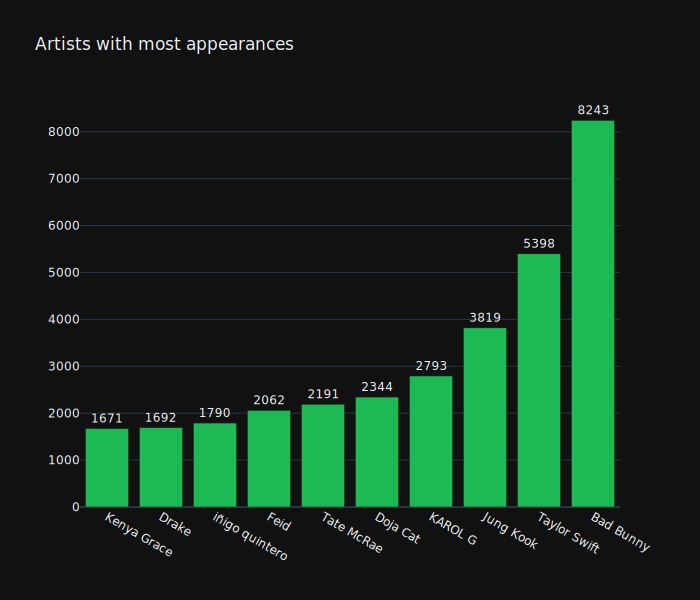

In [136]:
fig = px.bar(y= df['main_artist'].value_counts()[:10].sort_values(ascending=True).values, 
       x= df['main_artist'].value_counts()[:10].sort_values(ascending=True).index, 
       template= 'plotly_dark', 
       labels={'y': '', 'x': ''}, 
       height=600, text=df['main_artist'].value_counts()[:10].sort_values(ascending=True).values,
       color_discrete_sequence=['#1DB954'],
       title= 'Artists with most appearances'
      ).update_traces(textposition='outside')
fig.show('svg')

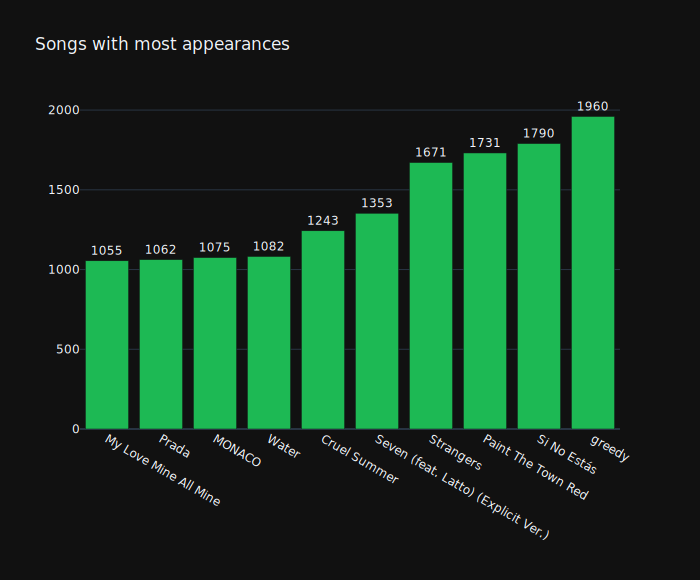

In [135]:
fig = px.bar(y= df['name'].value_counts()[:10].sort_values(ascending=True).values, 
       x= df['name'].value_counts()[:10].sort_values(ascending=True).index, 
       template= 'plotly_dark', 
       labels={'y': '', 'x': ''}, 
       height=580, text=df['name'].value_counts()[:10].sort_values(ascending=True).values,
       color_discrete_sequence=['#1DB954'],
       title= 'Songs with most appearances'
      ).update_traces(textposition='outside')
fig.show('svg')

In [41]:
most_feat_1= df['feat_1'].value_counts()
most_feat_2= df['feat_2'].value_counts()
total_feat= most_feat_1.add(most_feat_2, fill_value=0)
total_feat= total_feat.sort_values(ascending=False)[:10]
total_feat

Milo j            2217.0
Feid              2196.0
Young Miko        2083.0
Peso Pluma        1803.0
Latto             1357.0
Bad Bunny         1311.0
Carin Leon        1156.0
D-Block Europe    1062.0
RAYE              1062.0
Central Cee        971.0
dtype: float64

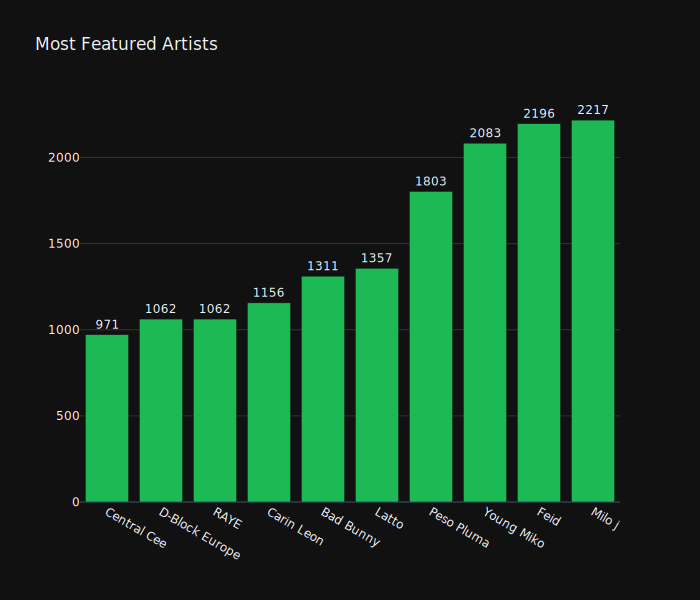

In [134]:
fig= px.bar(y= total_feat.sort_values(ascending=True).values, 
       x= total_feat.sort_values(ascending=True).index, 
       template= 'plotly_dark', 
       labels={'y': '', 'x': ''}, 
       height=600, text=total_feat.sort_values(ascending=True).values,
       color_discrete_sequence=['#1DB954'],
       title= 'Most Featured Artists'
      ).update_traces(textposition='outside')
fig.show('svg')

In [43]:
most_no1s = df[df['daily_rank']==1].groupby(['main_artist'])['daily_rank'].count().sort_values(ascending=False)[:10]
most_no1s

main_artist
Bad Bunny           439
iñigo quintero      304
Jung Kook           249
Kenya Grace         131
Maluma              117
AUR                  81
Jack Harlow          78
Tate McRae           77
Nadhif Basalamah     74
Taylor Swift         62
Name: daily_rank, dtype: int64

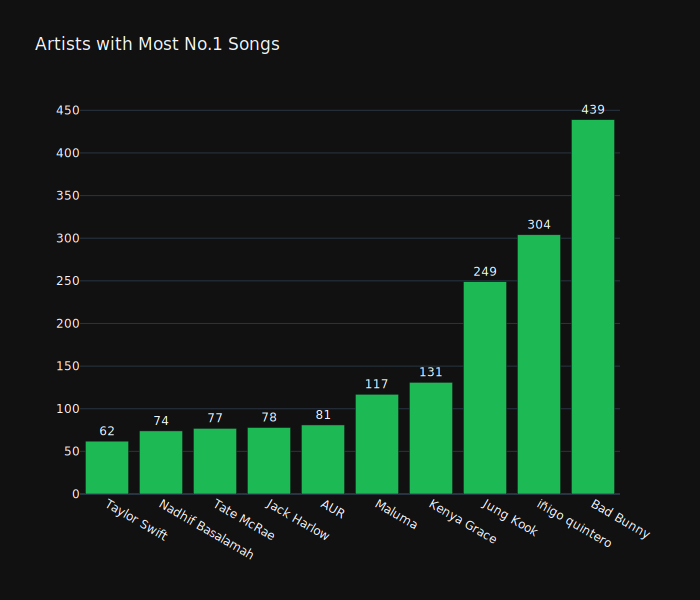

In [133]:
fig = px.bar(y= most_no1s.sort_values(ascending=True).values, 
       x= most_no1s.sort_values(ascending=True).index, 
       template= 'plotly_dark', 
       labels={'y': '', 'x': ''}, 
       height=600, text= most_no1s.sort_values(ascending=True).values,
       color_discrete_sequence=['#1DB954'],
       title= 'Artists with Most No.1 Songs'
      ).update_traces(textposition='outside')
fig.show('svg')

In [45]:
most_no1s_songs = df[df['daily_rank']==1].groupby(['name'])['daily_rank'].count().sort_values(ascending=False)[:10]
most_no1s_songs

name
PERRO NEGRO                            364
Si No Estás                            304
Seven (feat. Latto) (Explicit Ver.)    185
Strangers                              131
Según Quién                            117
Tu hai kahan                            81
Lovin On Me                             78
greedy                                  77
MONACO                                  75
penjaga hati                            74
Name: daily_rank, dtype: int64

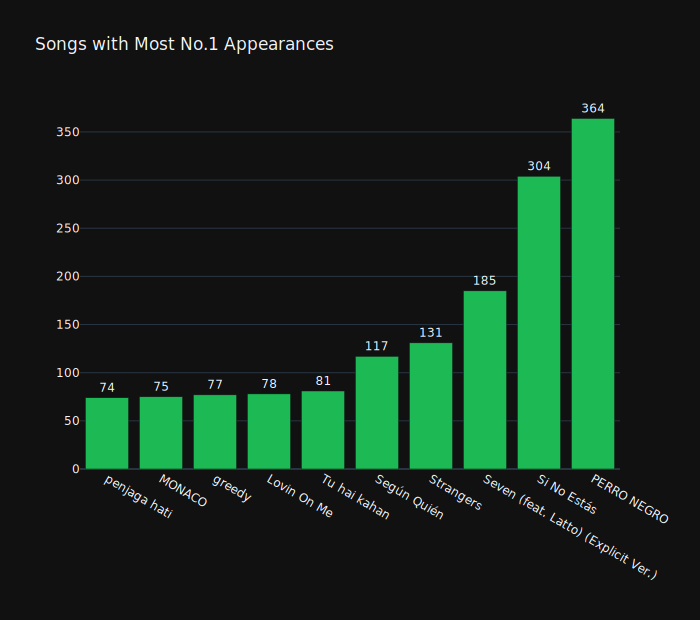

In [132]:
fig = px.bar(y= most_no1s_songs.sort_values(ascending=True).values, 
       x= most_no1s_songs.sort_values(ascending=True).index, 
       template= 'plotly_dark', 
       labels={'y': '', 'x': ''}, 
       height=620, text= most_no1s_songs.sort_values(ascending=True).values,
       color_discrete_sequence=['#1DB954'],
       title= 'Songs with Most No.1 Appearances'
      ).update_traces(textposition='outside')
fig.show('svg')

We will check some stats from artists with most appearances

In [47]:
artists = df['main_artist'].value_counts().nlargest(10).sort_values(ascending=True).index
df[(df['popularity']>0) & (df['main_artist'].isin(artists))].groupby(['main_artist'])[['daily_rank', 'popularity', 'days_since_album_release', 'duration_min']].agg([
    'mean', 'max', 'min', ('mode', lambda x: x.mode().iloc[0] if not x.mode().empty else None)])

daily_rank                  popularity                      \
                     mean   max  min  mode       mean    max   min   mode   
main_artist                                                                 
Bad Bunny       23.173359  50.0  1.0   1.0  89.890574   98.0  81.0   87.0   
Doja Cat        18.107082  50.0  1.0  11.0  86.648038   89.0  77.0   88.0   
Drake           26.033136  50.0  1.0  14.0  90.447337   94.0  67.0   94.0   
Feid            25.381183  50.0  4.0  17.0  87.262367   93.0  67.0   87.0   
Jung Kook       19.518220  50.0  1.0   1.0  89.609179   98.0  58.0   97.0   
KAROL G         22.878267  50.0  1.0   2.0  89.611171   94.0  77.0   90.0   
Kenya Grace     13.770197  50.0  1.0   1.0  97.705566   98.0  97.0   98.0   
Tate McRae      13.653126  50.0  1.0   2.0  97.325879  100.0  48.0  100.0   
Taylor Swift    26.731024  50.0  1.0  41.0  90.949113  100.0  73.0   99.0   
iñigo quintero  13.546927  50.0  1.0   1.0  98.222346   99.0  95.0   99.0   

               days_since_album_release                       duration_min  \
                                   mean     max    min   mode         mean   
main_artist                                                                  
Bad Bunny                     54.570302   574.0    5.0    5.0     3.681140   
Doja Cat                      49.333618    72.0   28.0   28.0     3.991681   
Drake                         63.586391  2765.0    3.0   12.0     4.230213   
Feid                         302.691562   443.0   19.0  423.0     2.999214   
Jung Kook                     35.685675  1236.0    2.0    3.0     3.137332   
KAROL G                      150.765843   280.0   69.0   88.0     2.840211   
Kenya Grace                   68.198085    91.0   47.0   47.0     2.880000   
Tate McRae                    49.872661    77.0    2.0   47.0     2.248498   
Taylor Swift                 761.862519  3311.0    2.0    4.0     3.421884   
iñigo quintero               411.084916   434.0  390.0  394.0     3.070000   

                                  
                 max   min  mode  
main_artist                       
Bad Bunny       6.32  2.06  4.45  
Doja Cat        4.42  3.84  3.84  
Drake           6.23  2.23  4.34  
Feid            3.80  2.60  3.27  
Jung Kook       4.00  2.44  3.36  
KAROL G         3.46  2.40  2.88  
Kenya Grace     2.88  2.88  2.88  
Tate McRae      2.66  2.20  2.20  
Taylor Swift    4.66  2.44  2.97  
iñigo quintero  3.07  3.07  3.07

Most Bad Bunny, Jung Kook, Kenya Grace and Iñigo Quintero songs are ranked 1.

Most Bad Bunny, ,Drake, Jung Kook, Tate McRae and Taylor Swift songs were released a few days ago.

Drake and Taylor Swift have songs way older than the other artists ranking in the tops.

Longest song released is 6.32.

There is preference for songs no longer than 4 minutes.

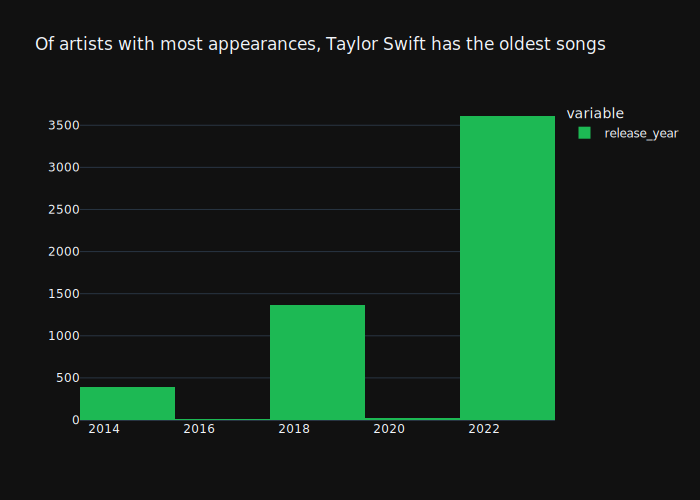

In [131]:
ts= df.loc[(df['main_artist']=='Taylor Swift')]
fig= px.histogram(ts['release_year'], nbins=6, template='plotly_dark', color_discrete_sequence=['#1DB954'],
            title='Of artists with most appearances, Taylor Swift has the oldest songs')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='')
fig.show('svg')

Now we want to see if there are any artists that appear in every continent playlist

In [49]:
unique_artists= df['main_artist'].unique()
appearances_by_continent= {}
number_of_continents= len(df['continent'].unique())
for artist in unique_artists:
    sub_df= df[df['main_artist']==artist]
    sub_continents= sub_df['continent'].unique()
    if len(sub_continents)==number_of_continents:
        for continent in sub_continents:
            if artist not in appearances_by_continent:
                appearances_by_continent[artist]={}
            appearances_by_continent[artist][continent]=len(sub_df[sub_df['continent']==continent])

In [50]:
artists_in_every_continent= pd.DataFrame(appearances_by_continent).reset_index().rename(columns={'index': 'continent'})
artists_in_every_continent= artists_in_every_continent.drop(6)
artists_in_every_continent

continent  Taylor Swift  Mariah Carey  Mitski  Jung Kook  Doja Cat  \
0           Global           343            18      43        137        79   
1           Africa            86             4       1         97        86   
2    South America           216             4      18        340        48   
3    North America           640            54     103         72       171   
4             Asia          1380            25     367       2259       617   
5           Europe          2096           450     421        675      1150   
7  Central America           123             7       6        213        15   

   Bad Bunny  KAROL G  Dua Lipa  Olivia Rodrigo  David Kushner  Lord Huron  \
0        115       43        49              66             54          21   
1        221       40        17               5              8           5   
2       2429     1325        24               9              3          20   
3        270       88        59             139             34          15   
4        275       59       169             154             86          38   
5        938      263       838             588            746         316   
7       3882      945        20              10             38          11   

   Billie Eilish  Peso Pluma  Drake  Darell  Feid  The Kid LAROI  Troye Sivan  \
0             39          38     63      27     2             14            4   
1             16         113    132      17    21              6            7   
2             29         246     57     392  1098              1           21   
3             52         228    334       3    31              7           19   
4            154          17    205      17    66            183           66   
5            393          79    681      68   124             64          241   
7             12         368     59     238   695              9            9   

   The Beatles  
0            2  
1            4  
2            1  
3            3  
4            1  
5           74  
7            3

In [51]:
artists_with_most_appearances = artists_in_every_continent.iloc[:,1:].sum(axis=0)
artists_with_most_appearances = list(artists_with_most_appearances.nlargest(5).index)
artists_with_most_appearances

['Bad Bunny', 'Taylor Swift', 'Jung Kook', 'KAROL G', 'Doja Cat']

We will select artists with most appearances in every continent.

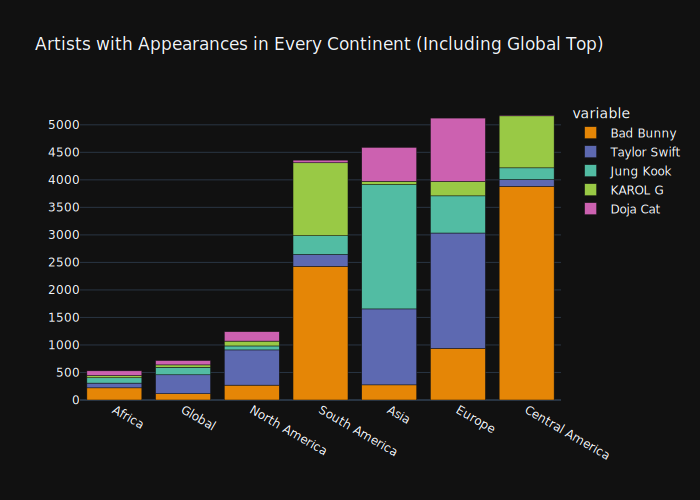

In [130]:
fig= px.bar(artists_in_every_continent, x='continent', y=artists_with_most_appearances,
               template='plotly_dark', color_discrete_sequence= px.colors.qualitative.Vivid, height=500,
                title='Artists with Appearances in Every Continent (Including Global Top)')

fig.update_yaxes(dtick=500, title_text='')
fig.update_xaxes(title_text='', categoryorder='total ascending')
fig.show('svg')

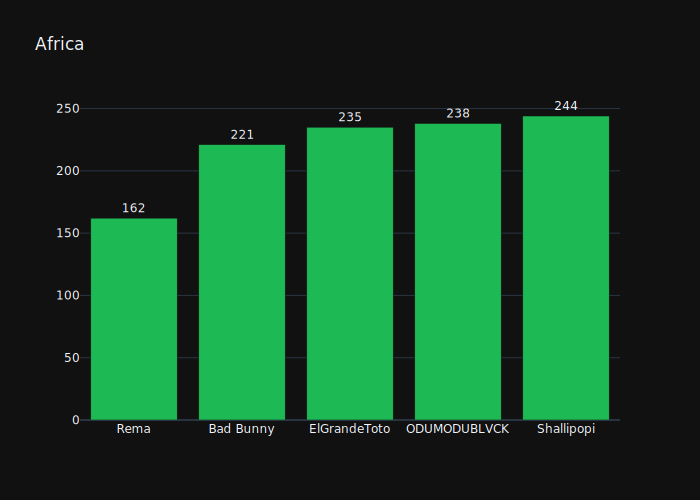

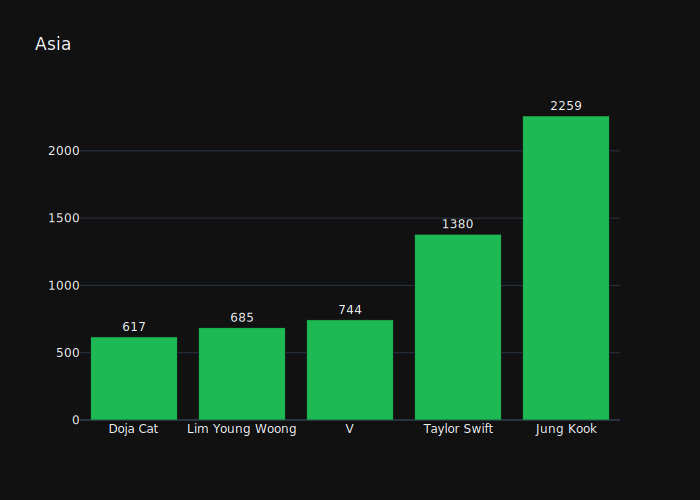

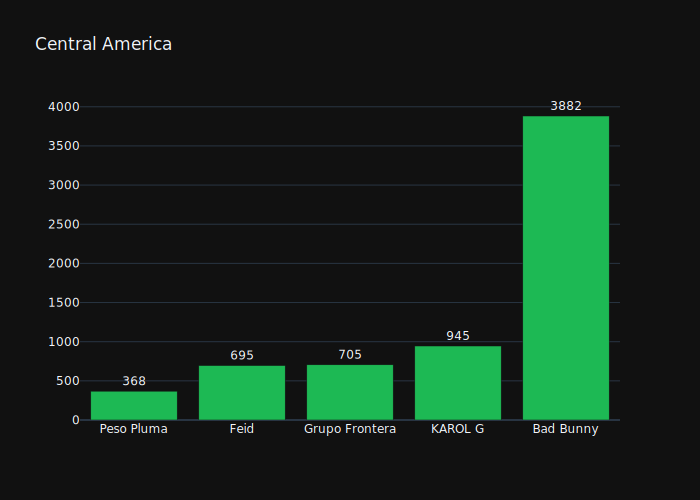

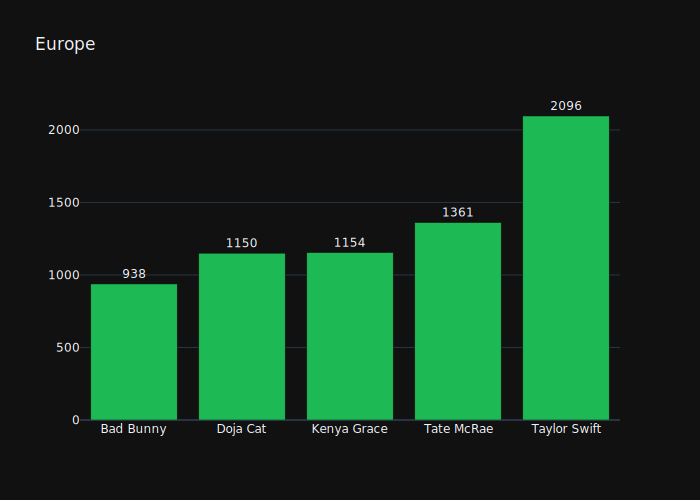

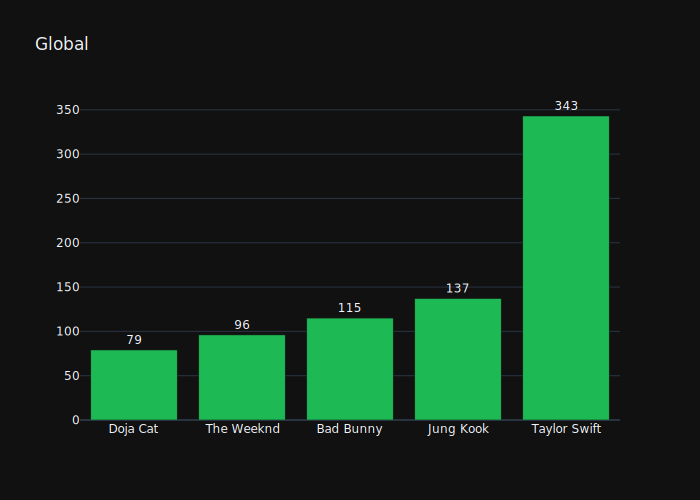

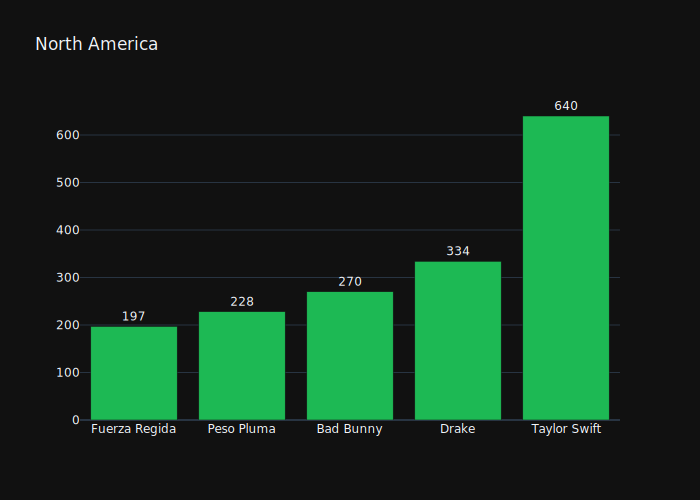

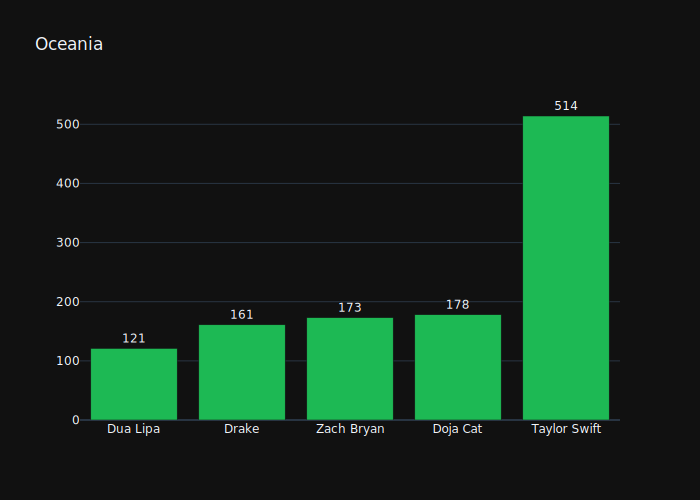

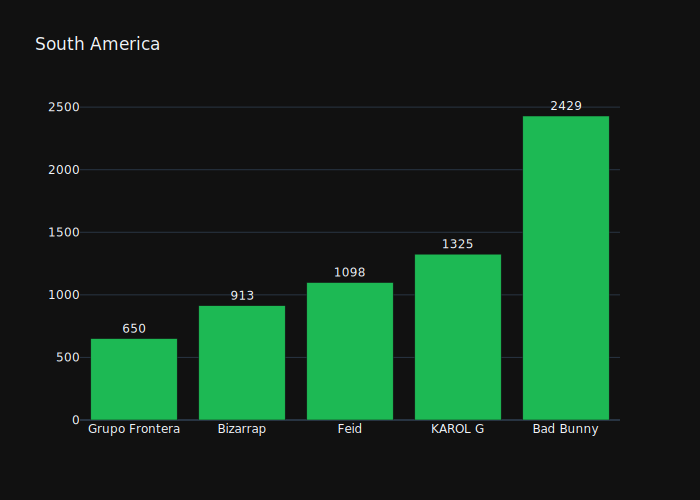

In [129]:
top_artists_by_continent = df.groupby(['continent', 'main_artist'])['main_artist'].count().reset_index(name='count')
top_artists_by_continent = top_artists_by_continent.sort_values(by=['continent', 'count'], ascending=[True, False])
top_artists_by_continent = top_artists_by_continent.groupby('continent').head(5)

continents_top= top_artists_by_continent['continent'].unique()

# Plotting top 5 artists in every continent
for i, continent in enumerate(continents_top):
    sub_df = top_artists_by_continent[top_artists_by_continent['continent'] == continent]  
    fig = px.bar(sub_df, x='main_artist', y='count', title=continent, template='plotly_dark', height=500,
                 color_discrete_sequence=['#1DB954'], text='count')  

    
    fig.update_xaxes(title_text='', categoryorder='total ascending')
    fig.update_yaxes(title_text='')
    fig.update_traces(textposition='outside')

    fig.show('svg')

Bad Bunny is present in every continent but Asia and Ocenia.

Taylor Swift is highly popular in Asia, where Jung Kook rules.

Africa has quite different preferences when it comes to music.

In [54]:
keys_and_mode= df.groupby(['key', 'mode'])[['mode']].count().unstack().reset_index()
keys_and_mode

key   mode       
mode        0.0    1.0
0      A   5115   9665
1      B   8881   5407
2     Bb   5809   4134
3      C   3722   8671
4     C#   7226  13345
5      D   7587   8486
6      E   8492   2741
7     Eb   3387    947
8      F   8076   9125
9     F#  10829   4617
10     G   6591   7912
11    G#   4770   8227

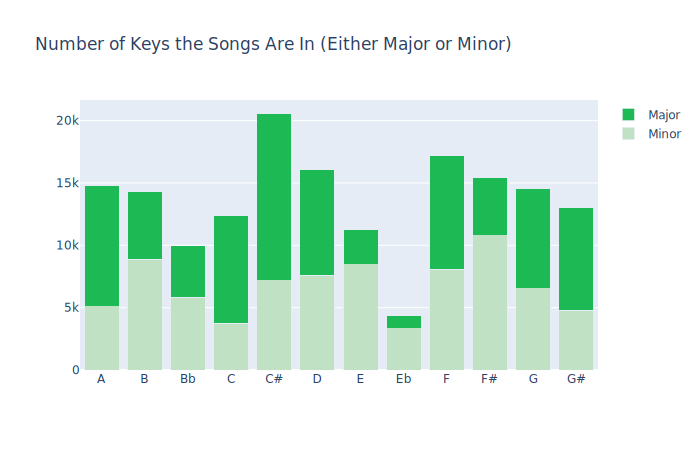

In [128]:
fig=go.Figure(data=[
    go.Bar(name='Minor', x=keys_and_mode['key'], y=keys_and_mode[('mode', 0.0)].values, marker_color='#C1E1C5'),
    go.Bar(name='Major', x=keys_and_mode['key'], y=keys_and_mode[('mode', 1.0)].values, marker_color='#1DB954')]).update_layout(
    barmode='stack',
    height=450,
    title='Number of Keys the Songs Are In (Either Major or Minor)' )
fig.show('svg')

We can't see a pattern in keys and modes. Only C# is preferred and Eb is not so popular for composers.

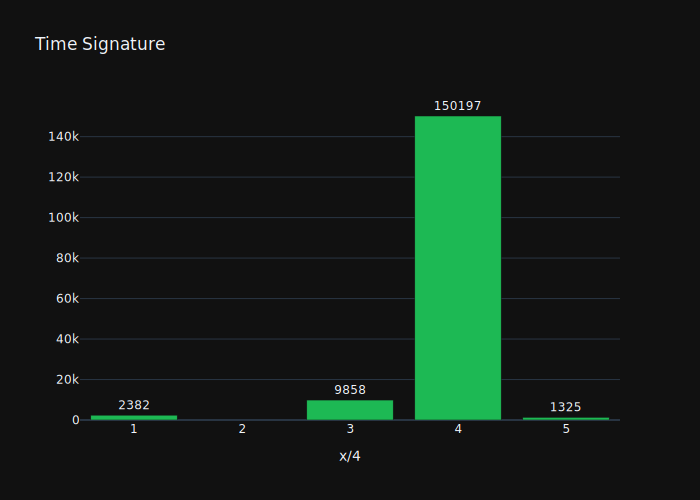

In [127]:
fig = px.bar(y= df['time_signature'].value_counts().sort_values(ascending=True).values, 
       x= df['time_signature'].value_counts().sort_values(ascending=True).index, 
       template= 'plotly_dark', 
       labels={'y': '', 'x': 'x/4'}, 
       height=500, text= df['time_signature'].value_counts().sort_values(ascending=True).values,
       color_discrete_sequence=['#1DB954'],
       title= 'Time Signature'
      ).update_traces(textposition='outside')
fig.show('svg')

As we may expect, 4/4 is the most common time signature. However, we can see there are songs in 5/4, which is unusual in popular music.

In [57]:
df['name'][df['time_signature']==5].unique()

array(['Ngimtholile', 'Can Dostum', 'Haegeum', 'Djurens vaggvisa',
       'Aktiv', "Let's Go 4", 'Baile do Bruxo', 'Khayaal', 'Tu Chacal',
       'Tu Buay', 'La Ruta', 'De Leven', 'Pidgin & English', '27',
       'WELD LAADOUL', 'Comforter (feat. Ayra Starr)', 'Ja sagen',
       'Эталон красоты', 'Allou', 'DEJA VU', 'PROSOPIKA FREESTYLE',
       'La Baby', 'Aleb Fel Dafater', 'Mala De Verdad (Tik Tak)',
       'Boy Boy', 'Onana', "Thank God It's Christmas - 2011 Remaster",
       'Tipo Hollywood', 'Fernando de Noronha', 'Ithuba',
       'Jestem Twoją Bajką', 'SĒNE!', 'Vem Quebrando', 'Somna',
       'Superstars', 'Red Button', 'Eu Sei ...', 'Pass me the light',
       'Ole (feat. BNXN)', 'People', 'Exxxonomy', 'Cuban Phonk',
       'PSYCHO (feat. MERO)', 'COMO ANTES', 'Oh My', 'LA FINE',
       'Akatsuki', 'Lambo (feat. VJ)', 'BRITNEY', 'DEFENDER',
       'My Brother', '6 BUSINESS DAYS (feat. Projexx)',
       'Roule un autre - A COLORS SHOW',
       'PICANTO (feat. Zlatan and ECko Mil

Above we can see the songs which are, according to the dataset, in 5/4.

In [58]:
df.loc[df['time_signature']==5].groupby(['time_signature', 'main_artist'])['main_artist'].count()

time_signature  main_artist    
5.0             Agust D            40
                Asme               32
                Bakr               45
                Balloranking        1
                Bella Shmurda      13
                Blaqbonez           1
                Bnxn               45
                Brytiago           43
                Bubbi Morthens      4
                Calcutta            1
                Capo                3
                Clicherik & Mäx     1
                DAVI               17
                DJ Louder           1
                Dj GBR             90
                Drake               4
                ElGrandeToto       38
                Emir Can İğrek     45
                Fireboy DML         4
                Haquil             45
                Hava               39
                Humlan Djojj       36
                Jazeek             41
                Jey One            42
                KEVIN ROLDAN        8
                Ke

And the artists as well.

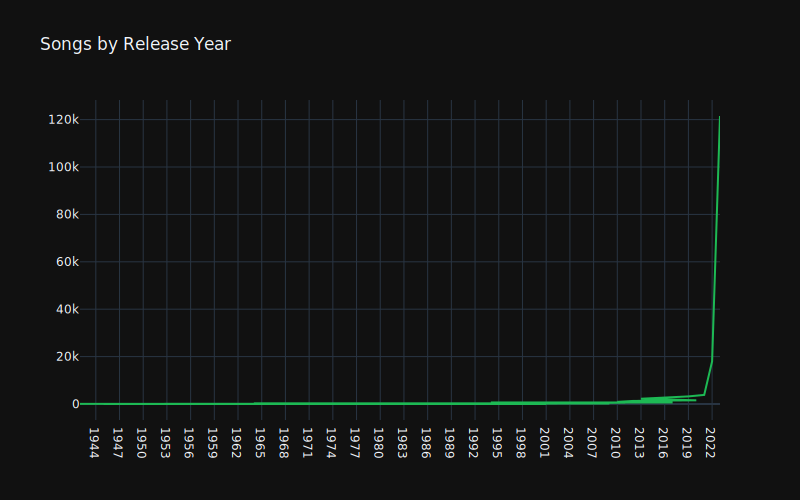

In [126]:
fig= px.line(y=df['release_year'].value_counts().values, 
        x=df['release_year'].value_counts().keys(),
        labels={'y': 'Number of songs', 'x':'Year'},
        template='plotly_dark',
        color_discrete_sequence=['#1DB954'],
        title='Songs by Release Year',
        width=800
       )
fig.update_xaxes(dtick=3, title_text='')
fig.update_yaxes(title_text='')
fig.show('svg')

In [60]:
df.query('release_year<=2021')['release_year'].value_counts().sort_index()

1942.0      46
1945.0       3
1957.0     268
1959.0     196
1962.0      48
1963.0     171
1964.0     278
1965.0      19
1967.0       1
1970.0      42
1971.0       1
1973.0       1
1974.0       2
1975.0       1
1976.0       1
1977.0     202
1979.0       2
1980.0      26
1981.0       1
1982.0      22
1983.0      36
1984.0      51
1985.0      28
1986.0       4
1987.0      25
1988.0     102
1989.0      10
1990.0       6
1991.0     108
1992.0       7
1993.0      80
1994.0     632
1995.0      21
1996.0       2
1997.0      51
1998.0      92
1999.0      45
2000.0      96
2001.0       3
2002.0     261
2003.0     256
2004.0     333
2005.0     289
2006.0     109
2007.0     337
2008.0     290
2009.0     199
2010.0     892
2011.0     571
2012.0    1296
2013.0    2222
2014.0    1450
2015.0     890
2016.0    1386
2017.0     643
2018.0    1505
2019.0    3202
2020.0    1557
2021.0    3836
Name: release_year, dtype: int64

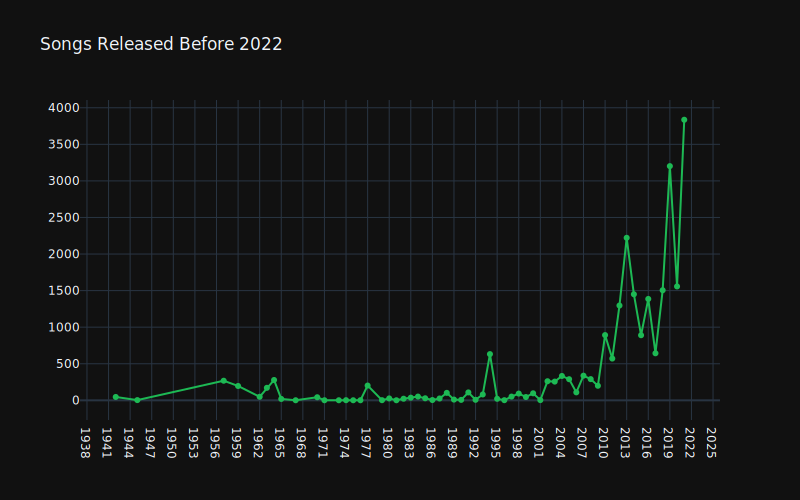

In [125]:
fig= px.line(y=df.query('release_year<=2021')['release_year'].value_counts().sort_index().values, 
        x=df.query('release_year<=2021')['release_year'].value_counts().sort_index().keys(),
        labels={'y': 'Number of songs', 'x':'Year'},
        template='plotly_dark',
        color_discrete_sequence=['#1DB954'],
        title='Songs Released Before 2022',
        width=800,
        markers=True
        
       )
fig.update_xaxes(dtick=3, title_text='')
fig.update_yaxes(title_text='')
fig.show('svg')

The rest of the songs were released between 1942 and 2023.

In [62]:
df.loc[(df['release_year']<2000)].groupby(['release_year','main_artist','name'])['name'].count().reset_index(name='count')

release_year            main_artist  \
0         1942.0            Bing Crosby   
1         1945.0            Bing Crosby   
2         1957.0            Bobby Helms   
3         1957.0          Elvis Presley   
4         1959.0            Dean Martin   
..           ...                    ...   
86        1999.0  Red Hot Chili Peppers   
87        1999.0  Red Hot Chili Peppers   
88        1999.0  Red Hot Chili Peppers   
89        1999.0  Red Hot Chili Peppers   
90        1999.0           Sara Tavares   

                                      name  count  
0           White Christmas - 1947 Version     46  
1        Mele Kalikimaka (Merry Christmas)      3  
2                         Jingle Bell Rock    261  
3                           Blue Christmas      7  
4   Let It Snow! Let It Snow! Let It Snow!    192  
..                                     ...    ...  
86                        Around the World      1  
87                         Californication      2  
88                               Otherside      2  
89                             Scar Tissue      2  
90                              Eu Sei ...      1  

[91 rows x 4 columns]

Since it is Christmas time, seasonal songs appear, then, Red Hot Chili Peppers have songs from previous years.

In [63]:
df.loc[(df['main_artist'].isin(artists))].groupby(['main_artist', 'is_explicit'])['is_explicit'].count().reset_index(name='count')

main_artist  is_explicit  count
0        Bad Bunny          0.0     17
1        Bad Bunny          1.0   8226
2         Doja Cat          1.0   2344
3            Drake          0.0     15
4            Drake          1.0   1677
5             Feid          0.0    785
6             Feid          1.0   1277
7        Jung Kook          0.0   1627
8        Jung Kook          1.0   2192
9          KAROL G          0.0    766
10         KAROL G          1.0   2027
11     Kenya Grace          0.0   1671
12      Tate McRae          1.0   2191
13    Taylor Swift          0.0   5375
14    Taylor Swift          1.0     23
15  iñigo quintero          0.0   1790

The 2 artists with most appearances have both, explicit and non-explicit songs. Bad Bunny has almost 100% explicit songs, while Taylor Swift 100% non-explicit songs

<Axes: >

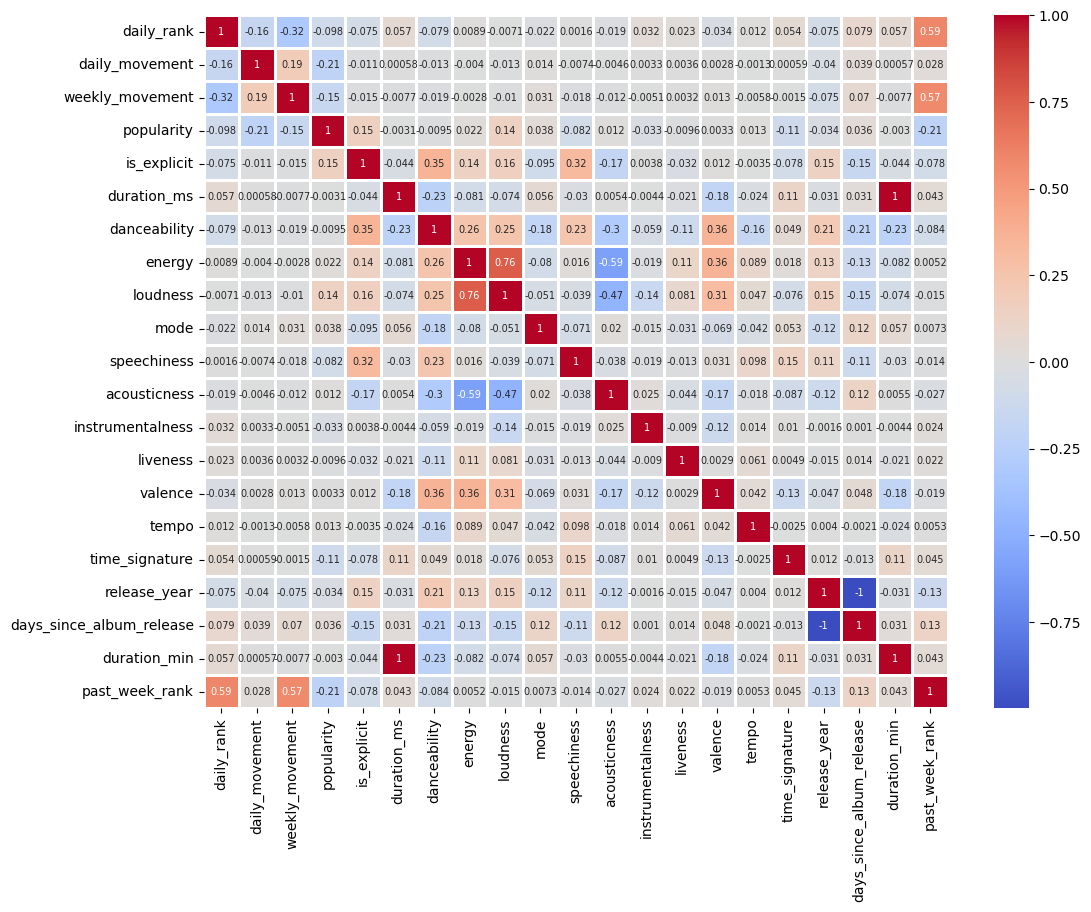

In [77]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', 
            linewidths=1, annot_kws={'size': 7})


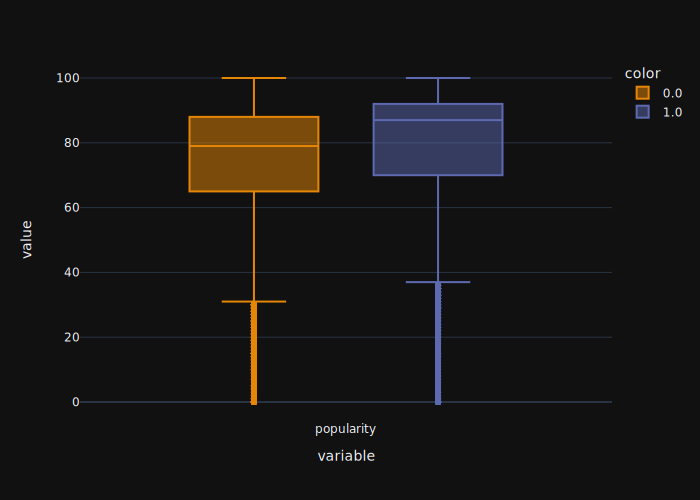

In [124]:
fig=px.box(df['popularity'], color=df['is_explicit'], template='plotly_dark', 
       color_discrete_sequence= px.colors.qualitative.Vivid)
fig.show('svg')

We can see that explicit songs are likely to be more popular. Nevertheless, being explicit is not the most important factor, as we saw with Taylor Swift music.

In [65]:
pointBiserialCorr = stats.pointbiserialr(x=df['is_explicit'], y=df['danceability'])
print(f"Point Biserial Correlation: {pointBiserialCorr}")

Point Biserial Correlation: SignificanceResult(statistic=0.3532428045122077, pvalue=0.0)


We used Point Biserial Correlation, since it is useful when comparing binomial and continuos variables.
We see a slight correlation and a significant pvalue.

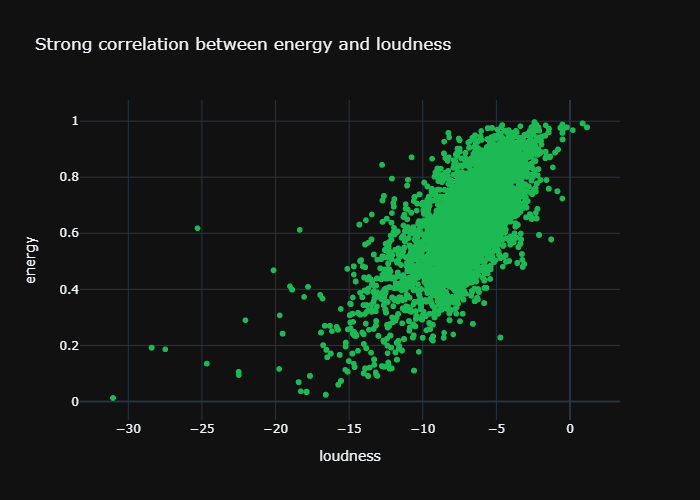

In [123]:
fig= px.scatter(df, x='loudness', y='energy', template='plotly_dark',
          color_discrete_sequence=['#1DB954'],
           title= 'Strong correlation between energy and loudness'
      )
fig.show('png')

Loudness and energy share a relationship. This may seem obvious, louder music is more intense and conveys and energetic feeling. 

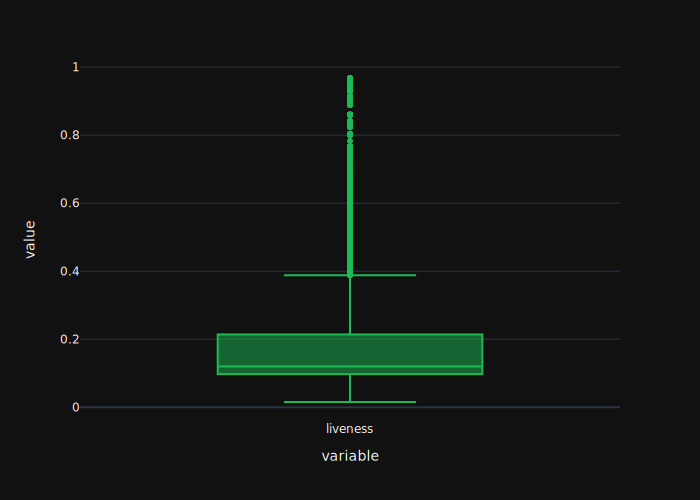

In [122]:
fig=px.box(df['liveness'], template='plotly_dark', color_discrete_sequence=['#1DB954'])
fig.show('svg')

In this section we see there is not likely to be presence of people during recordings.

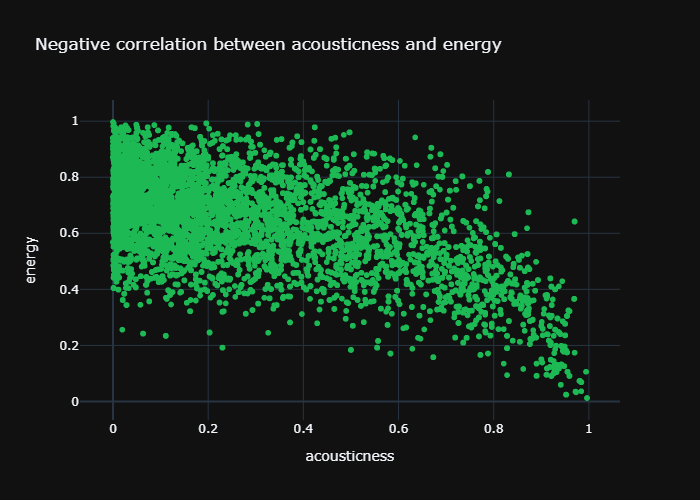

In [121]:
fig=px.scatter(df, x='acousticness', y='energy', template='plotly_dark',
          color_discrete_sequence=['#1DB954'],
           title= 'Negative correlation between acousticness and energy'
      )
fig.show('png')

There  not much acoustic instruments in more energetic songs. This can be interpreted since most of the songs are made digitally and do not use real instruments, like acoustic guitars precisely. 

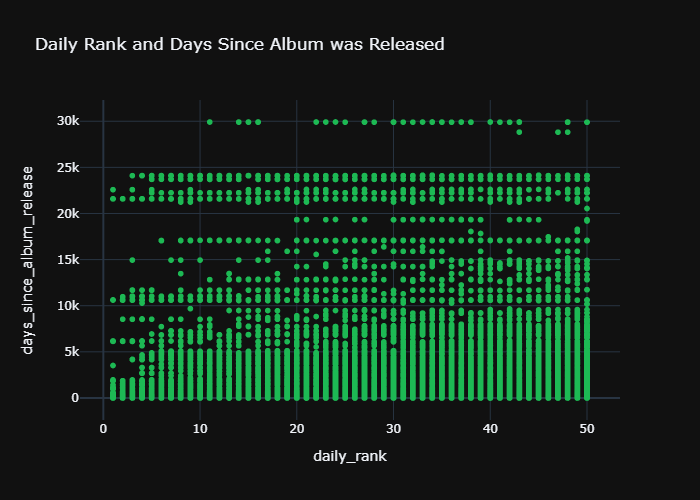

In [120]:
fig=px.scatter(df, x='daily_rank', y='days_since_album_release', template='plotly_dark',
          color_discrete_sequence=['#1DB954'],
           title= 'Daily Rank and Days Since Album was Released'
      )
fig.show('png')

In [71]:
df[['name', 'release_year']][(df['daily_rank']==1) & (df['days_since_album_release']>=3000)]

name  release_year
7550    Rockin' Around The Christmas Tree        1964.0
10950     All I Want for Christmas Is You        1994.0
11200   Rockin' Around The Christmas Tree        1964.0
14043     All I Want for Christmas Is You        1994.0
14093   Rockin' Around The Christmas Tree        1964.0
14843   Rockin' Around The Christmas Tree        1964.0
17493     All I Want for Christmas Is You        1994.0
17693     All I Want for Christmas Is You        1994.0
18493   Rockin' Around The Christmas Tree        1964.0
22593                    This Is The Life        2007.0
26243                    This Is The Life        2007.0
29889                    This Is The Life        2007.0
33533                    This Is The Life        2007.0
40859                    This Is The Life        2007.0
41744                       Dzimtā valoda        2014.0
44527                    This Is The Life        2007.0
48027                    This Is The Life        2007.0
51622                    This Is The Life        2007.0
98814                    This Is The Life        2007.0
102455                   This Is The Life        2007.0
108538                       Monster Mash        1962.0
117011                   This Is The Life        2007.0
120661                   This Is The Life        2007.0
124311                   This Is The Life        2007.0
127986                   This Is The Life        2007.0
131726                   This Is The Life        2007.0
149914                   This Is The Life        2007.0

Above are displayed songs with number 1 appearances and more than 3000 days since their release.

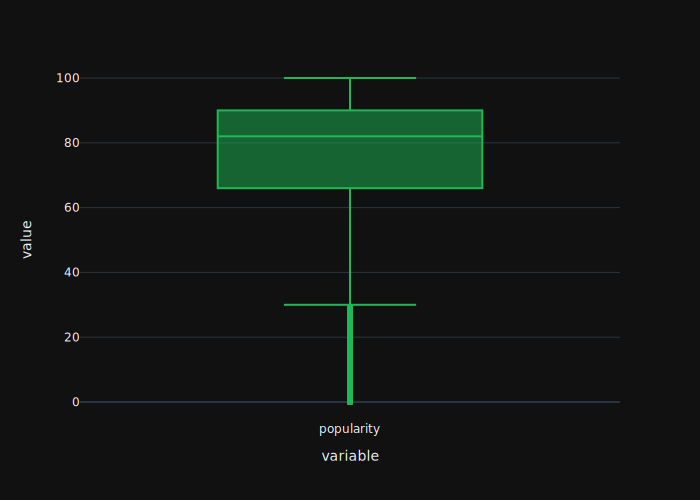

In [137]:
fig=px.box(df['popularity'], template='plotly_dark', color_discrete_sequence=['#1DB954'])
fig.show('svg')

As we saw earlier, there are songs with 0 of popularity and may be considered as outliers, up until a value of 29; according to the boxplot.

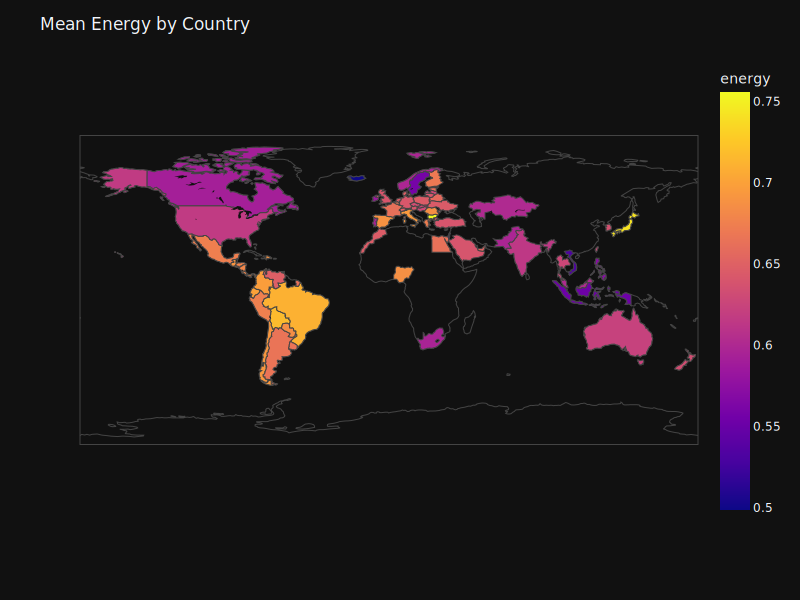

In [143]:
fig = px.choropleth(df.groupby(['country']).mean(numeric_only=True).reset_index(), locations='country', color='energy', 
              locationmode='country names', template='plotly_dark').update_layout(
                height=600, width=800, title='Mean Energy by Country')
fig.show('svg')

America seems to prefer more energetic music, along Japan and Bulgaria.

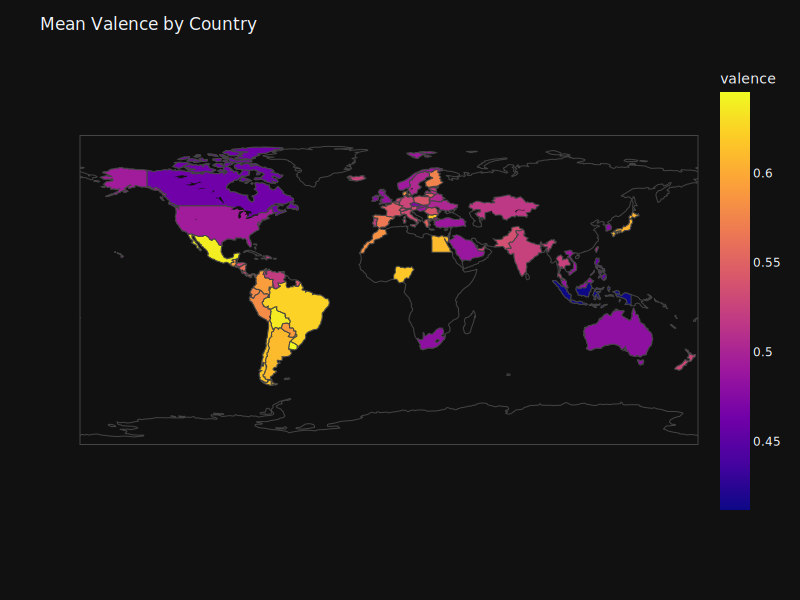

In [142]:
fig = px.choropleth(df.groupby(['country']).mean(numeric_only=True).reset_index(), locations='country', color='valence',
              locationmode='country names', template='plotly_dark').update_layout(
                height=600, width=800, title= 'Mean Valence by Country')
fig.show('svg')

Almost every country in South America prefers high valence in music, along Mexico.

North America and the rest of the world have mean values below 0.55. 

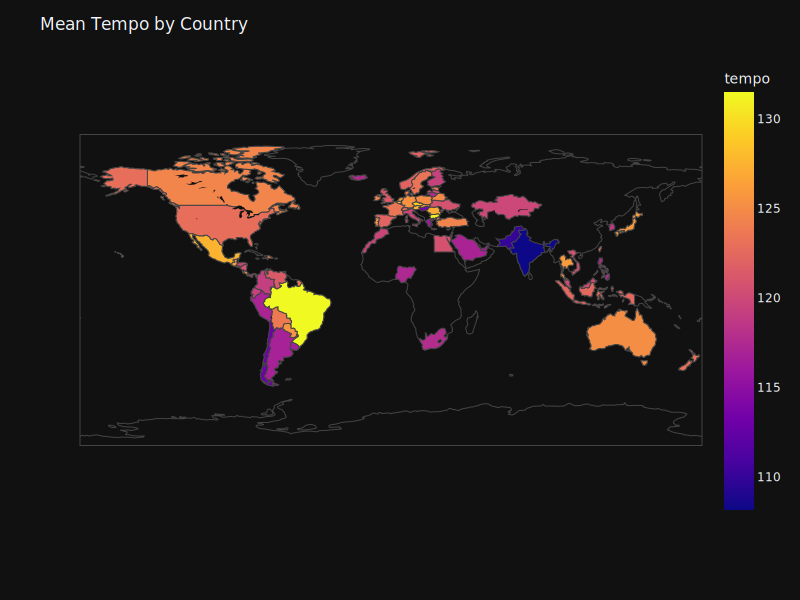

In [141]:
fig=px.choropleth(df.groupby(['country']).mean(numeric_only=True).reset_index(), locations='country', color='tempo',
              locationmode='country names', template='plotly_dark').update_layout(
                height=600, width=800, title='Mean Tempo by Country')
fig.show('svg')

This measure is a mixture of preferences.

Brazil has the highest mean in tempo and India the lowest.

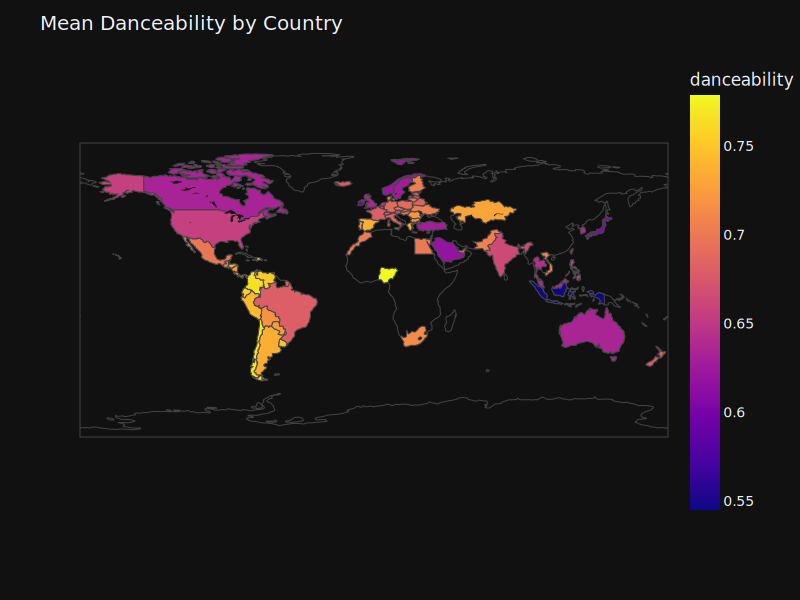

In [144]:
fig=px.choropleth(df.groupby(['country']).mean(numeric_only=True).reset_index(), locations='country', color='danceability',
              locationmode='country names', template='plotly_dark').update_layout(
                height=600, width=800, title='Mean Danceability by Country', font = dict(size=14,family="Franklin Gothic"))
fig.show('svg')

Latin America, Africa and some countries in Europe prefer more danceable music.

## Final Thougts

**a)** Artists currently popular are heading Spotify daily ranks, which may be obvious. Other aspects are that there are songs which were released several years ago and continue to be present in today's mainstream. In addition, seasonality plays a key role, Christmas songs are being more streamed due to this fact.

**b)** Other aspects such as explicitness, energy, loudness, valence and more seem to have a major impact in preferences.

**c)** Africa is quite distinct when it comes to music taste, as well as Asia, but Bad Bunny and Taylor Swift make an impact across these continents as seen in the charts.

**d)** Most popular songs were released in the current year.

**e)** Popular music is most of the times in 4/4 time signature.

Other findings are listed below the charts. Feel free to take a look.